In [20]:
# mount Google Drive vào Colab
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [22]:
# Đọc dữ liệu từ file Numpy và Excel
path="/content/drive/MyDrive/Final Project Python/catengushitpost.npy"
post_list = np.load(path,allow_pickle=True)
post_df_full = pd.read_excel("/content/drive/MyDrive/Final Project Python/catclean.xlsx")

In [23]:
post_df_full.head(5)

,post_id,post_text,time,timestamp,image,video_id,comments,shares,comments_full,reactors,w3_fb_url,reactions,reaction_count,image_id
0,378610048062267,,2023-11-21 15:14:09,1700579649,0,706349491428528,25,16,"[{'comment_id': '212628825201820', 'comment_ur...",[],https://www.facebook.com/catengushitpost/posts...,"{'thích': 143, 'yêu thích': 41, 'haha': 186, '...",374,0
1,378574944732444,Tự nhiên thèm hamburger🤤\n\nCre: Animals memep...,2023-11-21 14:00:20,1700575220,https://m.facebook.com/photo/view_full_size/?f...,0,75,64,"[{'comment_id': '312392238232599', 'comment_ur...","[{'name': 'Mít Ướt', 'link': 'https://facebook...",https://www.facebook.com/catengushitpost/posts...,"{'thích': 749, 'yêu thích': 427, 'haha': 322, ...",1533,378574928065779
2,378549564734982,Nói típ i,2023-11-21 13:01:15,1700571675,https://scontent-sjc3-1.xx.fbcdn.net/v/t39.308...,0,65,48,"[{'comment_id': '732194315623622', 'comment_ur...","[{'name': 'Hoàng Linh Trương', 'link': 'https:...",https://www.facebook.com/catengushitpost/posts...,"{'thích': 738, 'yêu thích': 27, 'haha': 424, '...",1299,378549548068317
3,378525251404080,"Trung bình những cặp đôi:\nMột đứa hay quạo, đ...",2023-11-21 12:00:54,1700568054,0,0,368,63,"[{'comment_id': '347233061228299', 'comment_ur...","[{'name': 'Thu Hồng', 'link': 'https://faceboo...",https://www.facebook.com/catengushitpost/posts...,"{'thích': 874, 'yêu thích': 22, 'haha': 929, '...",1866,378525231404082
4,378461914743747,trọn vị -)),2023-11-21 09:00:07,1700557207,https://m.facebook.com/photo/view_full_size/?f...,0,503,265,"[{'comment_id': '291316846590980', 'comment_ur...","[{'name': 'CHIÊM CHÂU', 'link': 'https://faceb...",https://www.facebook.com/catengushitpost/posts...,"{'thích': 1854, 'yêu thích': 49, 'haha': 2091,...",5308,378461814743757


In [24]:
print(post_list[0].keys())

dict_keys(['post_id', 'text', 'post_text', 'shared_text', 'original_text', 'time', 'timestamp', 'image', 'image_lowquality', 'images', 'images_description', 'images_lowquality', 'images_lowquality_description', 'video', 'video_duration_seconds', 'video_height', 'video_id', 'video_quality', 'video_size_MB', 'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments', 'shares', 'post_url', 'link', 'links', 'user_id', 'username', 'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url', 'available', 'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count', 'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live', 'fetched_time'])


In [25]:
from collections import defaultdict
user_comments = defaultdict(int)

for post_data in post_list:
    for comment_data in post_data['comments_full']:
        user = comment_data['commenter_name']
        user_comments[user] += 1

top_users_by_comments = sorted(user_comments.items(), key=lambda x: x[1], reverse=True)

print("Top người dùng có số lượng comment nhiều nhất:")
for user, comments_count in top_users_by_comments[:5]:
    print(f"{user}: {comments_count} comments")

Top người dùng có số lượng comment nhiều nhất:
Chocopie Dưa Hấu: 12 comments
Hà Annh: 11 comments
Đinh Nam: 10 comments
Minh Anh: 9 comments
Tớ Là Mạnh: 8 comments


In [26]:
catesp_stopwords = {
    "là", "của", "làm", "để", "trong", "và", "một", "có", "không", "cũng",
    "người", "khi", "được", "hay", "cho", "ở", "đã", "này", "nơi", "nữa",
    "nguyễn", "anh", "ngọc", "minh", "nguyen", "trần", "linh", "hoàng", "lê",
    "phương", "thanh", "khánh", "quỳnh", "trang", "thảo", "thị", "thu", "dương",
    "phạm", "mai", "nhi", "ngọc", "hà", "như", "ngoc", "trung", "bảo", "duy", "mỹ",
    "quang", "thư", "phan", "đi", "m", "mà", "quá", "phuong", "bùi", "huỳnh",
    "my", "hải", "gia", "hồng", "em", "yến", "vy", "luôn", "tran", "nhìn", "đức", "nhật",
    "chi", "thành", "ha", "lê", "ng"
}

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
!pip install wordcloud

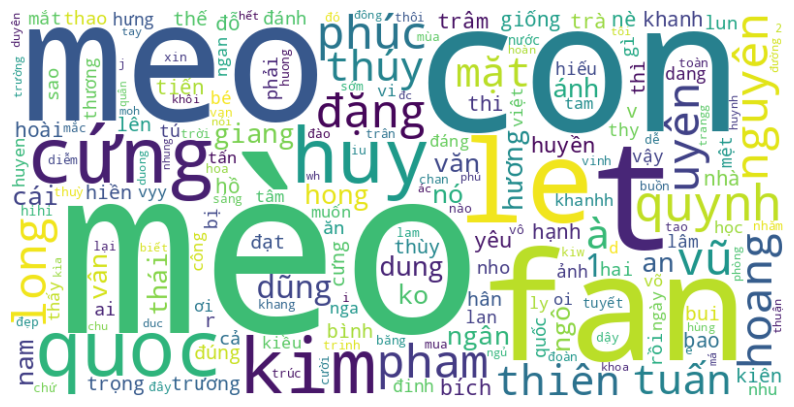

In [29]:
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stop_words = set(catesp_stopwords)

all_comments = ''
for post_data in post_list:
    for comment_data in post_data['comments_full']:
        comment_text = comment_data['comment_text']
        all_comments += comment_text.lower() + ' '

tokens = word_tokenize(all_comments)
tokens = [word for word in tokens if word.isalnum()]
tokens = [word for word in tokens if word not in string.punctuation]
tokens = [word for word in tokens if word not in stop_words]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(Counter(tokens)))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
# In ra chi tiết của từng dòng trong cột 'comments_full'
for comment_data in post_df_full['comments_full']:
    print(comment_data)

Output hidden; open in https://colab.research.google.com to view.

In [31]:
list_userID = []  # Danh sách chứa các commenter_id

for post_data in post_list:
    for comment_data in post_data['comments_full']:
        commenter_id = comment_data['commenter_id']
        list_userID.append(commenter_id)

# Hiển thị danh sách các commenter_id
print("Danh sách commenter_id:")
print(list_userID)

Danh sách commenter_id:
['100033304804134', '100014009529585', '100017470655049', '100024956081735', '100011144508999', '100004856353086', '100018803015573', '100014854087342', '100075549236509', '100066452246878', '100013885478858', '100089228707429', '100014440756160', '100035204560201', '100005355931730', '100028337855453', '100046735010221', '100047254921860', '100031677337501', '100068713432830', '100014171173196', '100087372401145', '100014183324888', '100075766292899', '100050272400618', '100015343500783', '100060248921567', '100094537245784', '100053081910229', '100022062194352', '100077428128409', '100079307133012', '100090828428887', '100006629649341', '100084726005151', '100027662255250', '100040801990750', '100004980253519', '100018749988944', '100053170477476', '100050895638654', '100032377072916', '100089577842413', '100075227187736', '100029695925463', '100049731403071', '100037412951724', '100087935753011', '100022062194352', '100033490424386', '100077190713463', '10009

In [32]:
# Chuyển list_userID thành một set để loại bỏ giá trị trùng lặp
unique_userID = list(set(list_userID))

# Hiển thị danh sách các commenter_id không trùng lặp
print("Danh sách commenter_id không trùng lặp:")
print(unique_userID)

Danh sách commenter_id không trùng lặp:
['100077319334596', '100027483921559', '100071664645322', '100047867224944', '100021589260527', '100030870009114', '100026649191818', '100047222221575', '100088571073112', '100043740730332', '100010517227986', '100054339185416', '1668891349', '100015293884785', '100039904414923', '100063775982651', '100084957114932', '100023142348211', '100052170528908', '100022980069461', '100007016462635', '100024677563465', '100053210344115', '100011455746938', '100079331607744', '100016504028512', '100075173619543', '100000053423969', '100082817441475', '100040563737881', '100051722984316', '100044579868045', '100062844726389', '100012602649984', '100040165065230', '100009593571811', '100051273550566', '100041507197944', '100060976063724', '100016163893955', '100019206630773', '100006513790946', '100078452929635', '100039697010535', '100051456519893', '100069912314936', '100071334962703', '100005333431430', '100074654631222', '100044904853716', '1000758078722

In [33]:
%pip install facebook_scraper

In [35]:
from facebook_scraper import get_profile
import time
COOKIE_PATH = "/content/drive/MyDrive/Final Project Python/cookies.txt"

# Danh sách chứa thông tin hồ sơ của người dùng
user_profiles = []

# Số lần lặp lại tối đa
max_iterations = 150

for index, user_id in enumerate(unique_userID):
    if index >= max_iterations:
        break

    time.sleep(20)
    try:
        profile = get_profile(user_id, cookies=COOKIE_PATH)
        user_profiles.append(profile)
        print(f"Lần thứ {index + 1} - Thông tin hồ sơ của người dùng {user_id}:")
        print(profile)
    except Exception as e:
        print(f"Không thể lấy thông tin hồ sơ của người dùng {user_id}: {str(e)}")

# Hiển thị thông tin hồ sơ của người dùng
print("Thông tin hồ sơ của các người dùng:")
print(user_profiles)

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100033304804134%3A103382489711013%3A33&paipv=0&eav=Afbp2UH0bFAiROvZVf7GHvvVxNIQSZnV33e8aJWoV3wkZrd9TjsKFk8mqewGMTVFe3I&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 1 - Thông tin hồ sơ của người dùng 100033304804134:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/371317426_1001233900996761_5535797107430946220_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=103&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=Y3ByQdQb-X8AX9-kb5Z&_nc_ht=scontent-lga3-2.xx&oh=00_AfDygMXivk85RnRkpoJeQKN5wBBc95dktmK4k9m0jeMd9g&oe=6572B855&manual_redirect=1', 'id': '100033304804134', 'Name': 'Phan van Khai', 'Thông tin liên hệ': '/phanvankhai1107\nFacebook', 'Thông tin cơ bản': 'Nam\nGiới tính', 'Các tên khác': 'ꕥؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖꗝꕥؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖꗝꗝؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖꕹؖؖؖؖؖؖؖؖꕥꕥؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖꗝꗝؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖꕹؖؖؖؖؖؖؖؖ\nBiệt danh', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100014009529585%3A103382489711013%3A33&paipv=0&eav=AfZ7eRjXv8JkKl6hq60kiwj3MrChjdqQaNwWG_JtFTaEsK--EC3IIrKdXchc83T9EfU&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 2 - Thông tin hồ sơ của người dùng 100014009529585:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Minh Thắng.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/399923906_1703656026778032_125909280445618494_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=8DRNoo9g9_8AX8FGkOO&_nc_ht=scontent-lga3-2.xx&oh=00_AfApzVl290fB4Dv-2dNqM9J39wlHJPch5qDL7rjbJwRfXQ&oe=6573675C&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/401841962_1709843052825996_5435680136517545205_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=VNOsVdB3jAQAX9aXKQK&_nc_ht=scontent-lga3-2.xx&oh=00_AfBPTOsDQOJe1ub4xmQOdu6g9zp28ZBlmgDGQg79kG-3gw&oe=6573DCE8&manual_redirect=1', 'id': '100014009529585', 'Name': 'Minh Thắng', 'Thông tin liên hệ': '/endorphin.001\nFacebook', 'Thông tin cơ bản': 'Nam\nGiới tính', 'Sự

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100017470655049%3A103382489711013%3A33&paipv=0&eav=AfZPYCwmenb5emVY90BID5ta_-v1b3piQ9sijWaRuCb3ljdvaz7YI8M0FCrFmv-EXAo&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 3 - Thông tin hồ sơ của người dùng 100017470655049:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'Dm cái này rất match màu anh Lỏ'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/394798845_1379778282614514_6277526261332016636_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=T6xjaxvRiHsAX_csTNx&_nc_ht=scontent-lga3-2.xx&oh=00_AfCaRwVT4gh4x-DnPZotAagS4TlWUSZ6cSJVLN6_kluPMw&oe=657488C9&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/346976407_135468126192060_8951892753231987640_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=103&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=bE-k-WLuJq4AX-P3Vgk&_nc_ht=scontent-lga3-2.xx&oh=00_AfCyiQsYq322Pp86itssMtEAa3w2YfQrxjjdrQDSmiX6ew&oe=657464DE&manual_redirect=1', 'id': '100017470655049', 'Name': 'Lê Hoàng Thục Khanh', 'Học vấn': 'Mỹ Thuật Công Nghiệp\nCao đẳng/Đại học\nTừ 24 tháng 9, 

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100024956081735%3A103382489711013%3A33&paipv=0&eav=AfZTBuDi9jNHNoyHhVEY_Kbb74LMQp04leJFTsIxLVs_UFMJko4bkz-4pFq6RgFoKZ4&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 4 - Thông tin hồ sơ của người dùng 100024956081735:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100024956081735', 'Name': 'Nguyễn Xuân', 'Thông tin liên hệ': '/NgXuan1207\nFacebook', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 5 - Thông tin hồ sơ của người dùng 100011144508999:
{'Friend_count': None, 'Follower_count': None, 'Following_count': 796, 'cover_photo_text': None, 'cover_photo': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/194983713_1388368291544641_2295264404798260863_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=109&ccb=1-7&_nc_sid=16e3db&efg=eyJpIjoidCJ9&_nc_ohc=60pXc1BJxfUAX_rKoh8&_nc_ht=scontent-lga3-2.xx&oh=00_AfAiwt7TcMnYgEBFyg-RfqEcqyzklBulSC5hFPzj8ZgA0w&oe=6572C6EA&manual_redirect=1', 'id': '100011144508999', 'Name': 'Ngọc Linh', 'Nơi từng sống': 'Hà Nội\nTỉnh/Thành phố hiện tại\nHà Nội\nQuê quán', 'Thông tin liên hệ': '/Schuvi\nFacebook', 'Thông tin cơ bản': 'Nữ\nGiới tính', 'Các tên khác': 'シュウ\nBiệt danh', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100004856353086%3A103382489711013%3A33&paipv=0&eav=AfZed9q80a0hv3LFVaOjbr9F6FCKd6oL3Dy1Uo3Dqrr43j0Qina6oX1HPBIuD8s1Bss&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 6 - Thông tin hồ sơ của người dùng 100004856353086:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Đặng Minh Nam.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/366352688_2388875324617656_5700557187331921733_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=3lukFEMrmbMAX-hRuHt&_nc_ht=scontent-lga3-2.xx&oh=00_AfBwqeZMELHN6KFfYbMIs8chJs92tDZGG9rx-4IGBZ_oGg&oe=6573DEE9&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/343295601_776147514152467_1538499315993648559_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=103&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=Ey1WlYthEYUAX9pf5WB&_nc_ht=scontent-lga3-2.xx&oh=00_AfD7-P8fidJ2sPuSavDi5JaG8EMNG2StIqu8h7DDuVqDtQ&oe=6572D881&manual_redirect=1', 'id': '100004856353086', 'Name': 'Đặng Minh Nam', 'Công việc': 'Thuisbezorgd.nl | Online Eten Bestellen\nExperience Courier\n4 tháng 5

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100018803015573%3A103382489711013%3A33&paipv=0&eav=AfYqyHKQzu5oH7viNbuOBifuHXSv4AnZbQYkhW5NSxQKqZEpjOMp1PXTstBDWmztAPc&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 7 - Thông tin hồ sơ của người dùng 100018803015573:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Phạm Nguyên.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/370550094_1316334452336643_4203403113589523886_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=oWnXiWbZMeMAX_bm-d9&_nc_ht=scontent-lga3-2.xx&oh=00_AfDZasHsfyCqCy0ogXYJzcpwaKyRv8Lw9vzhF375kt9htA&oe=65734AEF&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/370550094_1316334452336643_4203403113589523886_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=oWnXiWbZMeMAX_bm-d9&_nc_ht=scontent-lga3-2.xx&oh=00_AfDZasHsfyCqCy0ogXYJzcpwaKyRv8Lw9vzhF375kt9htA&oe=65734AEF&manual_redirect=1', 'id': '100018803015573', 'Name': 'Phạm Nguyên', 'Học vấn': 'THPT Ngô Quyền - Hải Phòng\nTrường trung học', 'Nơi từng sống': 'Hải Phòng\

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 8 - Thông tin hồ sơ của người dùng 100014854087342:
{'Friend_count': 2512, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Nguyễn Hoàng Nam.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/395591195_1722648504906936_3347872612035947664_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=107&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=EFUsxUYExQsAX9lRszN&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfCVbLqVRfAqjGw6wV2_8JCryxUDTwmwggMBxRiLSYGC3Q&oe=6572F439&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/395591195_1722648504906936_3347872612035947664_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=107&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=EFUsxUYExQsAX9lRszN&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfCVbLqVRfAqjGw6wV2_8JCryxUDTwmwggMBxRiLSYGC3Q&oe=6572F439&manual_redirect=1', 'id': '100014854087342', 'Name': 'Nguyễn Hoàng Nam', 'Công việc': 'TRUNG TÂM ĐÀO TẠO VÕ TH

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 9 - Thông tin hồ sơ của người dùng 100075549236509:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/342685079_744343833833007_6877515236177590023_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=lfaUI9LY0MMAX_n8fJI&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfBjPhxIEoomFv2k--JFpbTuCM9StYnudbGjrxY5P-PQiw&oe=6572B36D&manual_redirect=1', 'id': '100075549236509', 'Name': 'Ngoo Khanhs', 'Nơi từng sống': 'Biên Hòa\nTỉnh/Thành phố hiện tại\nCái Bè\nQuê quán', 'Thông tin liên hệ': '/keramyngo\nFacebook', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 10 - Thông tin hồ sơ của người dùng 100066452246878:
{'Friend_count': 47, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'Team này mạnh'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/358065254_626594542898948_6377566635912482731_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=107&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=I2S1ghRTHQMAX9eNm3h&_nc_ht=scontent-lga3-2.xx&oh=00_AfAPLLW9Bq4D0EDu8Zca55xnvJJ0Zban-BAC95cBmxSryw&oe=6572FF17&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/396729407_692070596351342_1223216281029083838_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=xxHCQAOB11YAX8NtYlT&_nc_ht=scontent-lga3-2.xx&oh=00_AfChTFUw_pNNASxVxXyH3L_39IF7jhmjT7zzLVE_68B9MA&oe=657441F4&manual_redirect=1', 'id': '100066452246878', 'Name': 'Phạm Khánh', 'Hạng mục': 'Người sáng tạo nội dung số', 'Tính minh bạch của trang cá nhân\nXem tất cả': 'Xem t

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 11 - Thông tin hồ sơ của người dùng 100013885478858:
{'Friend_count': 1, 'Follower_count': None, 'Following_count': None, 'id': '100013885478858', 'Name': 'Bánh Mì', 'Học vấn': '중앙대학교(Chung Ang University, CAU)\nCao đẳng/Đại học', 'Nơi từng sống': 'Seoul, Korea\nTỉnh/Thành phố hiện tại', 'Thông tin liên hệ': '/nhien412\nFacebook\nbbang.03\nInstagram', 'Thông tin cơ bản': 'Nữ\nGiới tính\n한국어\nNgôn ngữ', 'Các tên khác': 'Jeisy\nBiệt danh', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 12 - Thông tin hồ sơ của người dùng 100089228707429:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100089228707429', 'Name': 'Tuan Anh', 'Thông tin liên hệ': '/twanh12\nFacebook\nkerchoiwddas\nInstagram', 'Mối quan hệ': 'Mai Anh\nHẹn hò', 'Thành viên trong gia đình': 'Hương\nThú cưng\nAnh Thu\nThú cưng', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 13 - Thông tin hồ sơ của người dùng 100014440756160:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100014440756160', 'Name': 'Trần Hiếu Meo', 'Mối quan hệ': '', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 14 - Thông tin hồ sơ của người dùng 100035204560201:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/362287022_998439241339552_155381668743241367_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=gSHh_2hEjQQAX80dj84&_nc_ht=scontent-lga3-2.xx&oh=00_AfDa4xwkZ7UvSwkgNGisDY-iHpJ76Iy_79vKTW9BLbLo5g&oe=6572B71E&manual_redirect=1', 'id': '100035204560201', 'Name': 'Hà Hoàng', 'Nơi từng sống': 'Phan Thiết\nTỉnh/Thành phố hiện tại\nThành phố Hồ Chí Minh\nQuê quán', 'Thông tin liên hệ': '_hahoag_\nInstagram', 'Thông tin cơ bản': '2 tháng 10\nNgày sinh\nNam\nGiới tính', 'Mối quan hệ': 'Mis Thy\nHẹn hò', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 15 - Thông tin hồ sơ của người dùng 100005355931730:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/342733857_6081001922015015_5677573881392018903_n.png?_nc_cat=102&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=WeKcYyabYQAAX9rUmEe&_nc_ht=scontent-lga3-2.xx&oh=00_AfC6cJxMHXHryB-haLAwwVO9HDYEojGE51SiAwZPaQ7QFg&oe=65738610&manual_redirect=1', 'id': '100005355931730', 'Name': 'Cat Leo', 'Công việc': 'Saigon Books\nTranslator\n13 tháng 7, 2017 đến 30 tháng 12, 2018\nTakoyaki\nWriter\nTháng 12 năm 2015 - 2017\nTạp chí SouL\nWriter\nCSmile\nStaff writer', 'Học vấn': 'Trường Đại học Ngoại ngữ - Tin học TP. HCM - HUFLIT\nNgôn ngữ Anh\nTốt nghiệp năm 2021\nTHPT Trưng Vương Q.1\nTrường trung học\nTốt nghiệp năm 2017\nTrường THCS Hai Bà Trưng\nTrường trung học\nTốt nghiệp năm 2014', 'Nơi từng sống': 'Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại\nThành phố Hồ Chí Minh\nQuê quán', 'Thông tin c

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 16 - Thông tin hồ sơ của người dùng 100028337855453:
{'Friend_count': 843, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Toàn Lê.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/240115198_874599736827947_6687755078054699526_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=109&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=1qSqYF9G18QAX-uA_8L&_nc_ht=scontent-lga3-2.xx&oh=00_AfDCH9LaXExr2L3HC96Fu8mzbTHl6uGP3dGbXbaz7bK-9w&oe=65735F23&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/363331234_1330235354597714_5516432519774902999_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=111&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=Jepyis6kg0YAX-z4Zz4&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfAx9K98vtdBvYOhjA4TL3SSeLP8sBoSPvRI_TzVUwP3FQ&oe=657452BD&manual_redirect=1', 'id': '100028337855453', 'Name': 'Toàn Lê', 'Học vấn': 'Elms College\nCao đẳng/Đại học\n2023 - Hiện tại\nSpringfield Cen

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 17 - Thông tin hồ sơ của người dùng 100046735010221:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': None, 'cover_photo': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/279086245_519174029650426_5380051179537070505_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=a67b37&efg=eyJpIjoidCJ9&_nc_ohc=d6LvkvBIyBkAX_OEPB5&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfCuuzbAebk3wAF5Z-R5rEawU3CNgL_khK5XiKLXZlPwCA&oe=6572F6B3&manual_redirect=1', 'id': '100046735010221', 'Name': 'Quách Linh', 'Thông tin liên hệ': '/noikhongvoiyeuduong\nFacebook', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 18 - Thông tin hồ sơ của người dùng 100047254921860:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'Nao ăn hết 3 chục quả này thì gỡ ảnh :))\niu mẹ nhìu 🥲'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/385248686_852322396352917_6286232258937634039_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=6SLXsrhOJy0AX8yqtkU&_nc_ht=scontent-lga3-2.xx&oh=00_AfAuP5TLo3S14giAK80Q5katqPj3TaTEQgzAl29pMjp5Ag&oe=65734ED2&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/385258084_852657252986098_561504035639366092_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=aJwqlmOJ8I0AX-QcW8Y&_nc_ht=scontent-lga3-2.xx&oh=00_AfAfnLMY6Lmxq3GSxPwryFKIpHLCOxyc8cmrVXs5v-507g&oe=6572DE81&manual_redirect=1', 'id': '100047254921860', 'Name': 'Trần Thị Huyền Trang', 'Thông tin liên hệ': '/tuelang.tuelan.9\nFac

ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 19 - Thông tin hồ sơ của người dùng 100031677337501:
{'top_post': {'post_id': '363463572361050', 'text': 'aisss chết tiệt, dặn lòng mà quên dặn não 🥲\n\n#cungtiendinh', 'post_text': 'aisss chết tiệt, dặn lòng mà quên dặn não 🥲\n\n#cungtiendinh', 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2022, 3, 10, 2, 35, 19), 'timestamp': 1646879719, 'image': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/275661923_688913352142506_8671424175151945340_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=109&ccb=1-7&_nc_sid=c8266f&efg=eyJpIjoidCJ9&_nc_ohc=n0d6bNKQ5TIAX9LZJ4y&_nc_ht=scontent-lga3-2.xx&oh=00_AfC7EsEAm4GfrqyQ-1VyorcaT2mSM7mZXce5mjj8D3BdZg&oe=6574A872&manual_redirect=1', 'image_lowquality': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/275661923_688913352142506_8671424175151945340_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=109&ccb=1-7&_nc_sid=c8266f&efg=eyJpIjoidCJ9&_nc_ohc=n0d6bNKQ5TIAX9LZJ4y&_nc_ht=scontent-lga3-2.xx&oh=00_AfDRLo_DhnTR3YwhFpFhvWBf5nMJ

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 20 - Thông tin hồ sơ của người dùng 100068713432830:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100068713432830', 'Name': 'Hoang Le Thanh Truc', 'Nơi từng sống': 'Thành phố Hồ Chí Minh\nQuê quán', 'Thông tin liên hệ': '/thtruc08.10\nFacebook', 'Mối quan hệ': '', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 21 - Thông tin hồ sơ của người dùng 100014171173196:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/405511572_1774261689722853_1231247827849377911_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=NlgHfF1PSHsAX9Jmk-1&_nc_ht=scontent-lga3-2.xx&oh=00_AfB0Y8E1d37KDLgJW7TvJSBf99PVUKQFlYuDjapbpf0lxA&oe=65730376&manual_redirect=1', 'id': '100014171173196', 'Name': 'Ni Tieu', 'Công việc': 'Cần Thơ\nBarista\n11 tháng 3, 2023 - Hiện tại\nBarista', 'Học vấn': 'Trường Cao đẳng Du lịch Cần Thơ - CTC\nHướng dẫn du lịch', 'Nơi từng sống': 'Sóc Trăng\nTỉnh/Thành phố hiện tại', 'Thông tin cơ bản': 'Nữ\nGiới tính', 'Mối quan hệ': 'Hoàng Huy\nHẹn hò\nKể từ 22 tháng 12, 2018', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 22 - Thông tin hồ sơ của người dùng 100087372401145:
{'Friend_count': 192, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Ngọc Quang.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/400950990_324161507172927_6009678247799572405_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=t2KthIr1iG8AX9Xx_wm&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfBDqS2DvY5KaQL6-NWfPN0ouauh2SJCWqtQ-7Nq8_-ynA&oe=65733C91&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/406611905_334738452781899_8443459844480353596_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=111&ccb=1-7&_nc_sid=ab7367&efg=eyJpIjoidCJ9&_nc_ohc=z6Tahbs-QCIAX-zIkjg&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfCLGJdMRlVjk4lwKzU2rDgSufbGRSkIXiTES7Ec9TP7HA&oe=65741020&manual_redirect=1', 'id': '100087372401145', 'Name': 'Ngọc Quang', 'Hạng mục': 'Người sáng tạo nội dung số', 'Công việ

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 23 - Thông tin hồ sơ của người dùng 100014183324888:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Thành Sơn.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/397498637_1674933662989395_2862631166587015460_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=103&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=0iOj-3beENYAX_0IUF8&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfCv3V02jtoEd53Yq51RsEbQjGAlDxKl9u4xLe60O3P3QA&oe=6572B9FD&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/407098846_1690087771473984_5359207049071415937_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=tEFa0lhWVzwAX8qGKMx&_nc_oc=AQnRmoM_gHi2ci3TZjJ7QoWa-XAamqmq5bTwOaqDS_mtBXfyumQn-xYqyN1tn9JC0rU&_nc_ht=scontent-lga3-2.xx&oh=00_AfBfI4bwSmjIJjKZrOne58rnkYUEolEfgx2PBIVXfylF_Q&oe=6573CB66&manual_redirect=1', 'id': '100014183324888', 'Name': 'Thành S

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 24 - Thông tin hồ sơ của người dùng 100075766292899:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100075766292899', 'Name': 'Thuỳ Dương', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 25 - Thông tin hồ sơ của người dùng 100050272400618:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100050272400618', 'Name': 'Thảo Nguyên', 'Nơi từng sống': 'Đà Lạt\nQuê quán', 'Thông tin liên hệ': '/vthme\nFacebook\nwiesepf\nInstagram', 'Thông tin cơ bản': 'Nữ\nGiới tính', 'Các tên khác': 'wiese\nBiệt danh', 'Mối quan hệ': '', 'Thành viên trong gia đình': 'Nguyen Gia Tue\nChị gái\nKhánh Trân\nEm gái\nNguyen Phuong Anh\nEm gái\nPhan Trung Hiếu\nCháu trai\nMinh Phuong\nBà\nNguyễn Huỳnh Như Ngọc\nBà\nNgọc Tuyền\nThú cưng', 'Giới thiệu về Nguyên': 'helo mình là tnguyn nè, bạn có thích mình hong ? ✨😽', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 26 - Thông tin hồ sơ của người dùng 100015343500783:
{'Friend_count': 2021, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Trương Phương Vy.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t1.6435-9/78314139_731227444065366_3363323348296663040_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-7&_nc_sid=b5f135&efg=eyJpIjoidCJ9&_nc_ohc=jzHwpp3iZXkAX-0EC_P&_nc_ht=scontent-lga3-2.xx&oh=00_AfDAoa2tsWGEuWYjmXuA0du8SDpabCTzotvheiMtzAFmMA&oe=659638BD&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/404053177_1698707957317305_2177239517205821567_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=111&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=Sl5w1ecs2RYAX-aaqaQ&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfB3HswGr8mEV_ek0yLm20dg4IB4BnhURwd3HUTBBBiPkA&oe=65748CBC&manual_redirect=1', 'id': '100015343500783', 'Name': 'Trương Phương Vy', 'Công việc': 'Alley of El.\nNgười Trồng Hoa\n5 tháng 3, 2022

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 27 - Thông tin hồ sơ của người dùng 100060248921567:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'Trai đẹp owiiii'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/399285961_717477580270533_3213119290796012539_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=111&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=iwOfUIb6waoAX__jpJW&_nc_ht=scontent-lga3-2.xx&oh=00_AfBD6ACHvIrToKWz_WUHoxoxoriEl5sn06T4IRAU1knu5Q&oe=657420E1&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/405210738_729850912366533_4239224286399270560_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=YXSLxBU8m6IAX-sMq7r&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfBh1Oyyp3doLBcavkd1iw6HQEXxsN71LkBP43YMCmDJfA&oe=6572FD21&manual_redirect=1', 'id': '100060248921567', 'Name': 'Tớ Là Mạnh', 'Học vấn': 'Sinh viên Trường Cao Đẳng Công Thương Việt Nam - Cơ sở DakLa

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 28 - Thông tin hồ sơ của người dùng 100094537245784:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100094537245784', 'Name': 'Phạm Thu Quỳnh', 'Các tên khác': 'san\nBiệt danh', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 29 - Thông tin hồ sơ của người dùng 100053081910229:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'Kpha snhat nhưng cute nen de'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/371033249_835893688190021_5749039527031660510_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=ZDx9SFab6hkAX8Zhjnp&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfBpYSFBNELEFZ1NQ0F18lcwjtC1OhQa0XfVSlYxIgfV4A&oe=65734D7D&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/401684005_878764900569566_6157906790809288765_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=OfCnI2QXQ1IAX_9KTT_&_nc_oc=AQkjccEdGtGFszF9S7qTBDODRtcB-5pRTnB-20yPC9GyA6yxGW4X-rlEsy0CjJ5IcD4&_nc_ht=scontent-lga3-2.xx&oh=00_AfDleWQaHssY5y73AFxcDisLAuhUo7TE1j58SKQpI-WRvA&oe=65742C36&manual_redirect=1', 'id': '100053081910229', 'Name'

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 30 - Thông tin hồ sơ của người dùng 100022062194352:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100022062194352', 'Name': 'Thái Diệu', 'Nơi từng sống': 'Pleiku\nTỉnh/Thành phố hiện tại', 'Thông tin liên hệ': '/tomato.192\nFacebook\ntomato.192\nInstagram', 'Các tên khác': 'muộii\nBiệt danh', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 31 - Thông tin hồ sơ của người dùng 100077428128409:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100077428128409', 'Name': 'Đang Học Nè Má', 'Nơi từng sống': 'Hải Dương\nTỉnh/Thành phố hiện tại', 'Mối quan hệ': '', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 32 - Thông tin hồ sơ của người dùng 100079307133012:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100079307133012', 'Name': 'Kim Kim', 'Nơi từng sống': 'Hà Nội\nTỉnh/Thành phố hiện tại', 'Thông tin liên hệ': '/ngtramy1106\nFacebook', 'Mối quan hệ': 'Hẹn hò', 'Thành viên trong gia đình': 'Pham Duc Anh\nThú cưng', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 33 - Thông tin hồ sơ của người dùng 100090828428887:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/334291383_151575261089805_8450657072337468153_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=fae2mIB9PW4AX-EhL3k&_nc_ht=scontent-lga3-2.xx&oh=00_AfCQhW8L2jt2DJ0x1fIGr-91uKSbk94o8q9IxGsvOTiANw&oe=6574A505&manual_redirect=1', 'id': '100090828428887', 'Name': 'Phạm Đăng Dương', 'Nơi từng sống': 'Bắc Giang\nTỉnh/Thành phố hiện tại\nBắc Giang\nQuê quán', 'Thông tin cơ bản': '8 tháng 11, 2005\nNgày sinh', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 34 - Thông tin hồ sơ của người dùng 100006629649341:
{'Friend_count': 255, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'Can't take my eyes off you...'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/398090797_3746104905620461_1805135191212602130_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=107&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=ryRBeHnW9eEAX9TO0qU&_nc_ht=scontent-lga3-2.xx&oh=00_AfB_Qw3Z2be-zAoLRb5BJWMhuqD_zxe4rK4JhbsMQ0CCOA&oe=6573CA6D&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/398090797_3746104905620461_1805135191212602130_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=107&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=ryRBeHnW9eEAX9TO0qU&_nc_ht=scontent-lga3-2.xx&oh=00_AfB_Qw3Z2be-zAoLRb5BJWMhuqD_zxe4rK4JhbsMQ0CCOA&oe=6573CA6D&manual_redirect=1', 'id': '100006629649341', 'Name': 'Trương Thạnh', 'Nơi từng sống': 'Sóc Trăng\nTỉnh/Thành phố hiện tại\nSóc Trăng\nQuê quán',

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 35 - Thông tin hồ sơ của người dùng 100084726005151:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100084726005151', 'Name': 'Nguyễn Ngọc Ánh', 'Nơi từng sống': 'Vĩnh Long\nQuê quán', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=336189048756888&id=100070973875349&set=a.349143854128074&eav=AfZoXZAKh2HI1lMExlH9jIaCxqKbLzUijsbNI1P86cUYi-po34JOVd7cgtknwdPwodw&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY89m-QhUUDqId_U5rdLzFKAP6LZ3tHXwl0A5Z41sF0Ofx0V2KMZ1TRGwPA-RNmqGCXvPXiD7phArkkIeXIQ_z2x99WMywOhzyTePuacr1Ha4tE6B8lsrlrH5hDJH0ZqdeyU_yWLaXqOuuxtWhcDwEDw6AdY_sgwGvTywUfasR-CQEYzQvdIDbX1ftKxZInVmlg1NHy_REjbQIxaKRIYi-jZDoycmM09TAO2M4lBAE3kZYG6fQS9

Không thể lấy thông tin hồ sơ của người dùng 100027662255250: 500 Server Error: Internal Server Error for url: https://m.facebook.com/photo.php?fbid=336189048756888&id=100070973875349&set=a.349143854128074&eav=AfZoXZAKh2HI1lMExlH9jIaCxqKbLzUijsbNI1P86cUYi-po34JOVd7cgtknwdPwodw&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY89m-QhUUDqId_U5rdLzFKAP6LZ3tHXwl0A5Z41sF0Ofx0V2KMZ1TRGwPA-RNmqGCXvPXiD7phArkkIeXIQ_z2x99WMywOhzyTePuacr1Ha4tE6B8lsrlrH5hDJH0ZqdeyU_yWLaXqOuuxtWhcDwEDw6AdY_sgwGvTywUfasR-CQEYzQvdIDbX1ftKxZInVmlg1NHy_REjbQIxaKRIYi-jZDoycmM09TAO2M4lBAE3kZYG6fQS9NqVddE7ajMV3REaoKQj9Y-%5C-%5CxYhMQ0GILE-rmO05QNCS6qJHWT1jEued-eGgtMfH2o6NaKbaDnzdHHEFQKiu7EL6oZwAKTRQ6csA67mfFVQ7DaOfT1S5JUDroWuCfwyDPNTNndVmsTq1ZCe0y7uyf7-sL1MtVZ-9e4GxuDRaKzw9lhyBQNuqzfFx70fvrXXMVyNb25O3DVNRKYoUb09c96T21e4JVNAU7tvUuTsKBsJF4v7zfAXvsawCdj7unRpb1hK5tS16NrzR0ThzyMI4XKXLUmKeaJ6eYrj_Kk7_i7T4UfJnfVi085SwLL9zxmp1kNO5BqKw9SjuBnKO6MhhdrzbS6b3yFcjrskgImvAjzOxqwSih5BTvAbzmPKNpSriZ7M-bbKOXH7imK

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 37 - Thông tin hồ sơ của người dùng 100040801990750:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100040801990750', 'Name': 'Nguyễn Hưng Phúc', 'Nơi từng sống': 'Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại', 'Thông tin liên hệ': '/hwngfuc\nFacebook\nhwngfuc._\nInstagram', 'Các tên khác': 'Flynn\nBiệt danh', 'Mối quan hệ': 'Hoàng Thanh Minh\nCó mối quan hệ phức tạp', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 38 - Thông tin hồ sơ của người dùng 100004980253519:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t1.6435-9/81157831_1501809413328386_5185060467361447936_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=105&ccb=1-7&_nc_sid=b5f135&efg=eyJpIjoidCJ9&_nc_ohc=tHPe9mzvPvoAX8ZDy9j&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfA7mty_WWYkkqA7mrZkUt0LNJeT_to0AXa4i4Q0Rv4O3g&oe=6596198D&manual_redirect=1', 'id': '100004980253519', 'Name': 'Ngan Nguyen', 'Thông tin liên hệ': '/npquynhngan\nFacebook', 'Thông tin cơ bản': 'Nữ\nGiới tính', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo/view_full_size/?fbid=6868056466566932&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY87MleB1mauW2zbBWSeTDRpScyZXWnyOs5SV6O9BZGj3ksdMRxy52wqpKM4gkjATJxZPl4wgy-ue2nxAZCr-8nh260HPXUR5Lg3Bv8EIQ1xYENGJFAn79C1_BAVl9SJmwzCQeMA1F4HSldCH1m6yPBa55pH2qL_Mp0kcpvvLgCFZ_eiunxG4QP11pYRaCQV_ehQhhHLaH6KmVfWmoJm64VZf54AxGlVmts34eNFiP2fzLJKKikQWNpV4askqqFtqqM-DLy1Ec_V0x7CU47uyaU0wGkVl-4E2iCJlzr8sj0svSK13wy_722Dl8V

Lần thứ 39 - Thông tin hồ sơ của người dùng 100018749988944:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': None, 'cover_photo': None, 'profile_picture': 'https://m.facebook.com/photo/view_full_size/?fbid=6868056466566932&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY87MleB1mauW2zbBWSeTDRpScyZXWnyOs5SV6O9BZGj3ksdMRxy52wqpKM4gkjATJxZPl4wgy-ue2nxAZCr-8nh260HPXUR5Lg3Bv8EIQ1xYENGJFAn79C1_BAVl9SJmwzCQeMA1F4HSldCH1m6yPBa55pH2qL_Mp0kcpvvLgCFZ_eiunxG4QP11pYRaCQV_ehQhhHLaH6KmVfWmoJm64VZf54AxGlVmts34eNFiP2fzLJKKikQWNpV4askqqFtqqM-DLy1Ec_V0x7CU47uyaU0wGkVl-4E2iCJlzr8sj0svSK13wy_722Dl8VSfi_7W2nibRTu9Mos_EppyV4jswKAcYnkBATeKbvUDIds1lPyBIcVl_LZ74pjTXR8OtE-0O_1420ZCfNfH-_CouM0NQn19Ikv9-vianfSjOImtpVfh6g3LzmBmX5fe0ahTtUfx8JWJPn5QcM327EjQlxiQZrnzxkkcG8UfTWlwV257jyttl6kdtFQVc-onuHQpKkdnFV0-QbdyhbnMQZom-yZqmrW2ul7rrkqdZaZInP7eIvu753Kq-VlIchgzHvQ7cGQ0mZagkvbBZ1ZU0PdXuxGAqHaGahtwfxC7WAHnSrj0eqDTmlAS9wCy

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 40 - Thông tin hồ sơ của người dùng 100053170477476:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Kim Ngọc.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/312595472_644580840657593_2632853283150947586_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=W5gK9iSrvLgAX_q9bIG&_nc_ht=scontent-lga3-2.xx&oh=00_AfA7erjLCW9EXs7pmGI4BTc9vZ4lLLNB4Sr3_xnb8h7gqw&oe=65735769&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/405901920_873162207799454_8966882830460996610_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=105&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=QYcFm4yjgccAX9aiKQK&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfCVjAxSdUwGFdQP777tFBGie7CnCI2zgfYePnE_uHOEmA&oe=6573077A&manual_redirect=1', 'id': '100053170477476', 'Name': 'Kim Ngọc', 'Nơi từng sống': 'Tân Châu\nTỉnh/Thành phố hiện tại', 'Các tên khác': 'Ú\n

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 41 - Thông tin hồ sơ của người dùng 100050895638654:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'Ko bt nói j..'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/405408343_873569017682945_527488455413430243_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=103&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=yzJSZpg8vw4AX8-zbcm&_nc_ht=scontent-lga3-2.xx&oh=00_AfDFpjjZRGZiXhb9yXjk_3Itpl497iuuBqBEBV7pA1GQUw&oe=657441F0&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/407176366_873573324349181_5719548157074504743_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=7xAbzpxW1P0AX-AtfE4&_nc_ht=scontent-lga3-2.xx&oh=00_AfAJ0A8H8jOB20HT4fcrFuoeyuLi-EuSTRi2NDVaK7pwgg&oe=65743ABA&manual_redirect=1', 'id': '100050895638654', 'Name': 'Nguyễn Đức Tuấn', 'Học vấn': 'Liên đội trường THCS Võ Văn Ký - TP. Nha Trang\nTrường trung học', 'Nơi từng s

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 42 - Thông tin hồ sơ của người dùng 100032377072916:
{'Friend_count': 256, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Ngọc Nhi Trần Nguyễn.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/314026450_797739441315284_8074044666358353289_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=107&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=PO40H6_r-4kAX9t6Qaw&_nc_ht=scontent-lga3-2.xx&oh=00_AfCjdwjb93ZYXi9eD3tYtaVNxGAeoU3qE4r3zGcH-jLOqA&oe=65737E47&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/406527239_1006770103745549_20583270687126152_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=9UAMH16kC_MAX-sy9LA&_nc_ht=scontent-lga3-2.xx&oh=00_AfC3MJ8x7veqgc2HhgHrcJK8JoLUbNNXbdkZvOQ0e-ALNg&oe=6574006E&manual_redirect=1', 'id': '100032377072916', 'Name': 'Ngọc Nhi Trần Nguyễn', 'Thông tin liên hệ': '/hiroshi.yumi.96\nFacebook\nbaosss_003\nInstagram'

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 43 - Thông tin hồ sơ của người dùng 100089577842413:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Duy Nguyễn.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/402986958_299275516401708_5190665299353425336_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=fY0ZW1buJfgAX_2EV7k&_nc_ht=scontent-lga3-2.xx&oh=00_AfDhlu-D8Un6wR8BxyKysNUXhZLW63Mwf7qBdwTlbO27KQ&oe=6573A891&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/406598466_306275679035025_1672991988999040439_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=CHYJ_4wIxPgAX9-dEs3&_nc_ht=scontent-lga3-2.xx&oh=00_AfAkaV7Xx7UJYVqwP9pTkiqoVv9XovGAatPm2aO8g0zsPw&oe=657340F2&manual_redirect=1', 'id': '100089577842413', 'Name': 'Duy Nguyễn', 'Thông tin liên hệ': '/Eserr.000\nFacebook\nEser000._\nSpotify\neser000._\nInstagram', 'Cá

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 44 - Thông tin hồ sơ của người dùng 100075227187736:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100075227187736', 'Name': 'Linh Nguyen', 'Nơi từng sống': 'Biên Hòa\nTỉnh/Thành phố hiện tại', 'Thông tin liên hệ': '/ninh.of.wwpu\nFacebook', 'Các tên khác': 'ninhh\nBiệt danh', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 45 - Thông tin hồ sơ của người dùng 100029695925463:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Bích Uyên.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/271711798_668717707461421_5204308503615711871_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=RSV15OB3D4MAX9x7EtY&_nc_ht=scontent-lga3-2.xx&oh=00_AfB_cAUyCJXrtZ7MNaO6qxECADo2RLprOdIAYXZ8rfKH7Q&oe=6573E2D8&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/395809618_314473348003540_2535605496011222566_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=8baee0&efg=eyJpIjoidCJ9&_nc_ohc=esPdAttK_34AX9UmKvQ&_nc_ht=scontent-lga3-2.xx&oh=00_AfAByw9-yD5ZzlRX94sr969L3yKWIyPF6Up-DtFx7VuTcA&oe=65730DB7&manual_redirect=1', 'id': '100029695925463', 'Name': 'Bích Uyên', 'Học vấn': 'Trường Cao đẳng Chuyên môn Chú thuật Tokyo\nCao đẳng/Đại học\n2021 - Hiện tại\nT

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 46 - Thông tin hồ sơ của người dùng 100049731403071:
{'Friend_count': 61, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Trần Lê Nhật Quang.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/323780868_854319002349761_2311163228709374586_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=109&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=vHAxyY_O7_sAX9peBUh&_nc_ht=scontent-lga3-2.xx&oh=00_AfASbaQGMlNnF4ROBq4-7QN5_v5apFPgBCobqs7Zdg6Jzg&oe=65732343&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/398663991_843105007357205_4019313034560952609_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=MexjroIZy5MAX--1CIv&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfAsaz-fekbbibIySuitpTzTKQfWrC1VmVmK7uobqjcvPA&oe=6573CBBA&manual_redirect=1', 'id': '100049731403071', 'Name': 'Trần Lê Nhật Quang', 'Nơi từng sống': 'Thành phố Hồ Chí Minh\nTỉnh/Thành phố 

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 47 - Thông tin hồ sơ của người dùng 100037412951724:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/399533179_1023572988899790_7512964589780214564_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=103&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=oXmbl-p1k5IAX-xUZEn&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfAO319kLmISb7rTrCBSOGr75eAGm6w-LWHuniOrvVlhqw&oe=65742496&manual_redirect=1', 'id': '100037412951724', 'Name': 'Thu', 'Nơi từng sống': 'Hà Nội\nTỉnh/Thành phố hiện tại\nThái Bình\nQuê quán', 'Thông tin liên hệ': '/thunt2310\nFacebook', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 48 - Thông tin hồ sơ của người dùng 100087935753011:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100087935753011', 'Name': 'Duc Anh', 'Học vấn': 'Trường Đại học Giao thông vận tải TP.HCM\nCao đẳng/Đại học\n2022 - Hiện tại', 'Mối quan hệ': '', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 49 - Thông tin hồ sơ của người dùng 100022062194352:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100022062194352', 'Name': 'Thái Diệu', 'Nơi từng sống': 'Pleiku\nTỉnh/Thành phố hiện tại', 'Thông tin liên hệ': '/tomato.192\nFacebook\ntomato.192\nInstagram', 'Các tên khác': 'muộii\nBiệt danh', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 50 - Thông tin hồ sơ của người dùng 100033490424386:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100033490424386', 'Name': 'Nguyễn Ngọc Phương Trinh', 'Thông tin liên hệ': '/ptxddthvl\nFacebook\njena_fk\nInstagram', 'Thông tin cơ bản': '13 tháng 3\nNgày sinh', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 51 - Thông tin hồ sơ của người dùng 100077190713463:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/274812863_125035356746154_2236138713144189879_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=sEzKcHuNMCwAX9EDref&_nc_ht=scontent-lga3-2.xx&oh=00_AfA287u7gntf8BACBGg-7ezWa2Xj4DJZA68Snj87fj9tkg&oe=65743ABA&manual_redirect=1', 'id': '100077190713463', 'Name': 'Đinh Duy Mạnh', 'Học vấn': 'Đại Học Thủy Lợi\nCao đẳng/Đại học\n2021 - Hiện tại', 'Nơi từng sống': 'Hà Nội\nTỉnh/Thành phố hiện tại\nHải Dương\nQuê quán', 'Thông tin cơ bản': '2003\nNăm sinh', 'Mối quan hệ': 'Độc thân', 'Thành viên trong gia đình': 'Ng Bao Anh\nThú cưng', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 52 - Thông tin hồ sơ của người dùng 100090987827106:
{'Friend_count': 330, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/406522838_285620081147584_8766296961305745057_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=v12_sEgR1FUAX8qyP7g&_nc_ht=scontent-lga3-2.xx&oh=00_AfCNgamvnGbUq89LxFQER2PdruNtxsrEETSY9lndxrLPUg&oe=6573B7E5&manual_redirect=1', 'id': '100090987827106', 'Name': 'Hoàng Thị Bình', 'Nơi từng sống': 'Lạng Sơn\nTỉnh/Thành phố hiện tại', 'Thông tin cơ bản': '9 tháng 5\nNgày sinh', 'Mối quan hệ': 'Có mối quan hệ phức tạp', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 53 - Thông tin hồ sơ của người dùng 100064407219737:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/406230218_756469983176569_5401688697463279607_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=H-NY9wHaoAEAX_2tWdF&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfC9s2aeJLinotc-EA1QBVczel50KiF52L4dap20kQpfiQ&oe=6573B6EA&manual_redirect=1', 'id': '100064407219737', 'Name': 'David Nguyen', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 54 - Thông tin hồ sơ của người dùng 100040505656269:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100040505656269', 'Name': 'Hân Nemooz', 'Thông tin liên hệ': '/giahanzz.22605\nFacebook', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 55 - Thông tin hồ sơ của người dùng 100078924336000:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Anya Williams.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/386381065_340466011927541_8190746945619970928_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=fdsrsIXRS5wAX8GmTVc&_nc_ht=scontent-lga3-2.xx&oh=00_AfBzuNy8eIHhz-BNq470GbBX6HJX11xi-BUffs4h7vsvgg&oe=657407CE&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/402083203_363519359622206_7732136252719962845_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=105&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=FyJhFAq5BXwAX-gJymP&_nc_ht=scontent-lga3-2.xx&oh=00_AfCqv_5_ZExQvRj036336Tas4SyQHOSnHCVTmA_luFF7iA&oe=6574A417&manual_redirect=1', 'id': '100078924336000', 'Name': 'Anya Williams', 'Các tên khác': 'Nhóc\nBiệt danh', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 56 - Thông tin hồ sơ của người dùng 100035201825033:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100035201825033', 'Name': 'Khải Hoàn', 'Thông tin cơ bản': 'Nam\nGiới tính', 'Các tên khác': 'Hòn\nBiệt danh', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 57 - Thông tin hồ sơ của người dùng 100070053015010:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100070053015010', 'Name': 'Phương Nghi', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 58 - Thông tin hồ sơ của người dùng 100038879351196:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/383221636_975999470372689_6754625337378895125_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=111&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=RoPM2ICpmw0AX-dbbf5&_nc_ht=scontent-lga3-2.xx&oh=00_AfBqYHWO1Tm83bvevMw16YxxasjPf0OED6Pn-gr1FiJGGw&oe=6574A16E&manual_redirect=1', 'id': '100038879351196', 'Name': 'Đinh Công Nguyên', 'Các tên khác': 'nd\nBiệt danh', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 59 - Thông tin hồ sơ của người dùng 100055778785318:
{'Friend_count': 417, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': None, 'cover_photo': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/291902512_545464623989492_1249268456035026316_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=109&ccb=1-7&_nc_sid=a67b37&efg=eyJpIjoidCJ9&_nc_ohc=fGBscpl_LjsAX_phs0M&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfDIqQcINy5eCJlAl8vEhXXCrN15wxMT5IxxxdHcW9MeKg&oe=6572C6B7&manual_redirect=1', 'id': '100055778785318', 'Name': 'Vũ Tú', 'Thành viên trong gia đình': 'Phuong Linh\nThú cưng\nMinh Anh\nThú cưng', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 60 - Thông tin hồ sơ của người dùng 100080119374529:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100080119374529', 'Name': 'An An Snail', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 61 - Thông tin hồ sơ của người dùng 100055431739490:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Move Jaay.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/243130147_409542954236759_3673007657214571797_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=n_aI7n6YJkcAX8UhWdq&_nc_ht=scontent-lga3-2.xx&oh=00_AfDzT3tWKeweqL5sg3l6hvt2_hz0Ln1VqRgTIIHGiRuiaA&oe=6572E99F&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/243130147_409542954236759_3673007657214571797_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=n_aI7n6YJkcAX8UhWdq&_nc_ht=scontent-lga3-2.xx&oh=00_AfDzT3tWKeweqL5sg3l6hvt2_hz0Ln1VqRgTIIHGiRuiaA&oe=6572E99F&manual_redirect=1', 'id': '100055431739490', 'Name': 'Move Jaay', 'Thông tin liên hệ': '/move.jaay\nFacebook', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 62 - Thông tin hồ sơ của người dùng 100014171173196:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/405511572_1774261689722853_1231247827849377911_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=NlgHfF1PSHsAX9Jmk-1&_nc_ht=scontent-lga3-2.xx&oh=00_AfB0Y8E1d37KDLgJW7TvJSBf99PVUKQFlYuDjapbpf0lxA&oe=65730376&manual_redirect=1', 'id': '100014171173196', 'Name': 'Ni Tieu', 'Công việc': 'Cần Thơ\nBarista\n11 tháng 3, 2023 - Hiện tại\nBarista', 'Học vấn': 'Trường Cao đẳng Du lịch Cần Thơ - CTC\nHướng dẫn du lịch', 'Nơi từng sống': 'Sóc Trăng\nTỉnh/Thành phố hiện tại', 'Thông tin cơ bản': 'Nữ\nGiới tính', 'Mối quan hệ': 'Hoàng Huy\nHẹn hò\nKể từ 22 tháng 12, 2018', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 63 - Thông tin hồ sơ của người dùng 100053509334083:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/400869101_791972295929741_8846520921362517500_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=105&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=xqeZVYZKZO0AX8lthed&_nc_ht=scontent-lga3-2.xx&oh=00_AfCF9jNbTGgfJf1vge8nbkUiUSh0uPF2VpuF5aA7K1lHsg&oe=657492EE&manual_redirect=1', 'id': '100053509334083', 'Name': 'Tiến Võ', 'Thông tin liên hệ': '/tuilaMoeTday\nFacebook', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 64 - Thông tin hồ sơ của người dùng 100038431839290:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/403770211_1029296788361373_9153771517665812945_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=5DEGDtxkWTkAX93skci&_nc_ht=scontent-lga3-2.xx&oh=00_AfCyCW8JMOrin3PzDrX7bUbp2g_3adTThwRNM9SiYucLWw&oe=6574970F&manual_redirect=1', 'id': '100038431839290', 'Name': 'Hpg Uwo', 'Thông tin cơ bản': 'Nữ\nGiới tính', 'Các tên khác': 'pjxezfv\nBiệt danh', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 65 - Thông tin hồ sơ của người dùng 100043351278865:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Quocc Haoo.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/397888535_1049437839844582_4202695094849190789_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=mT3MZvd-1DIAX-Cnyj2&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfAjGk3aH4UY2PoaxAt07M_YXDy21kZYbT7EMKZ8vEHAAA&oe=6572F287&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/398806356_1051315132990186_4733004870483288620_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=OnCRa3MjizcAX_-Ws82&_nc_ht=scontent-lga3-2.xx&oh=00_AfBtVc-IaRNdz4135MoxMAaSOB0aXlOLw_Sp919f8cGsyg&oe=6574019A&manual_redirect=1', 'id': '100043351278865', 'Name': 'Quocc Haoo', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 66 - Thông tin hồ sơ của người dùng 100008491720434:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100008491720434', 'Name': 'Duy Phan', 'Nơi từng sống': 'Biên Hòa\nTỉnh/Thành phố hiện tại\nNinh Bình\nQuê quán', 'Thông tin liên hệ': '/duyphan070525\nFacebook', 'Thông tin cơ bản': '7 tháng 5\nNgày sinh\nNam\nGiới tính', 'Các tên khác': 'zuyy fann\nBiệt danh', 'Mối quan hệ': 'Loan Loan\nHẹn hò', 'Thành viên trong gia đình': 'Loan Loan\nThú cưng', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 67 - Thông tin hồ sơ của người dùng 100003682329822:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'Trong tình yêu, nếu chưa tìm được mối nào ngon hơn thì người ta gọi đó là lòng chung thuỷ ☺️'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t1.6435-9/49485820_1530188090447254_1076033605664243712_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=111&ccb=1-7&_nc_sid=b5f135&efg=eyJpIjoidCJ9&_nc_ohc=YD_-dcNNgdsAX8klBc6&_nc_ht=scontent-lga3-2.xx&oh=00_AfAhW1ULU8aDWfmGAjma2MaPwBAhdCh1b7hBnXPBW15yPA&oe=65961A86&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/357065145_2961102414022474_582436435156764747_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=a67b37&efg=eyJpIjoidCJ9&_nc_ohc=ALAOo7409JwAX-Ueasv&_nc_ht=scontent-lga3-2.xx&oh=00_AfBskCS3xgrab90IuY6ER2SRdEC1_01YCsEkbow_FXbSUg&oe=65730A3F&manual_redirect=1', 'id': '100003682329822', 'Name': 'Kiều Như', 'Thông tin liên hệ'

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 68 - Thông tin hồ sơ của người dùng 61552888020162:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': None, 'cover_photo': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/397615033_122101387772096267_7221581962498754697_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=pshSW4pS4b4AX-dXfv8&_nc_ht=scontent-lga3-2.xx&oh=00_AfAeR5FVba7kEIEp2lLW09k0dl9KaJ7UcVput-HMsVvcwQ&oe=6572F355&manual_redirect=1', 'id': '61552888020162', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 69 - Thông tin hồ sơ của người dùng 100071711767247:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/402921012_362461129487610_3323458028879888319_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=109&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=ntitMqDhNZUAX_kIiqK&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfCcgix6S1bcx64cmaoVQBPArm-nchfBJA_rVeCa1iM83g&oe=6573466D&manual_redirect=1', 'id': '100071711767247', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 70 - Thông tin hồ sơ của người dùng 100082541562778:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100082541562778', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 71 - Thông tin hồ sơ của người dùng 100022164660875:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/379871980_1490506645031477_1363341974455601846_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=3Pk9oQj2dBoAX-sgNip&_nc_ht=scontent-lga3-2.xx&oh=00_AfCV8HmrgEf6nEyT0eZutNnk-wVJtLNCcvIVourZ-ft1SA&oe=6574A35C&manual_redirect=1', 'id': '100022164660875', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 72 - Thông tin hồ sơ của người dùng 100024564854423:
{'top_post': {'post_id': '878053476356806', 'text': 'Tình yêu không giống cafe\nTrải 1 nửa rồi mới thấy vị', 'post_text': 'Tình yêu không giống cafe\nTrải 1 nửa rồi mới thấy vị', 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2021, 1, 17, 15, 29), 'timestamp': None, 'image': 'https://scontent-lga3-2.xx.fbcdn.net/v/t1.6435-9/139570225_878053293023491_3044033176525440757_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=101&ccb=1-7&_nc_sid=512d91&efg=eyJpIjoidCJ9&_nc_ohc=W99d-5BN0woAX_zVkJ5&_nc_ht=scontent-lga3-2.xx&oh=00_AfAXCHPzhfnUQ3aO4bjSkhMykhDkMWxPQmYJ4n-WgzUiSg&oe=659625DF&manual_redirect=1', 'image_lowquality': 'https://scontent-lga3-2.xx.fbcdn.net/v/t1.6435-9/139570225_878053293023491_3044033176525440757_n.jpg?stp=cp0_dst-jpg_e15_p240x240_q65&_nc_cat=101&ccb=1-7&_nc_sid=512d91&efg=eyJpIjoidCJ9&_nc_ohc=W99d-5BN0woAX_zVkJ5&_nc_ht=scontent-lga3-2.xx&oh=00_AfBUwPAkjybx0rweyXAxr3ZFYPZe_g1vvF2aW1uVhSwGXg&oe=65962

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 73 - Thông tin hồ sơ của người dùng 100074726561285:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100074726561285', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 74 - Thông tin hồ sơ của người dùng 100066149657781:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': None, 'cover_photo': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/273788819_273682374846749_4406962703982738780_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=16e3db&efg=eyJpIjoidCJ9&_nc_ohc=LHqX6GFKnMQAX8L1tqW&_nc_ht=scontent-lga3-2.xx&oh=00_AfBFrjx1LPplS--6V3AbOmhdcDs-VSOnA2xekrKr9vMCdg&oe=65737425&manual_redirect=1', 'id': '100066149657781', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 75 - Thông tin hồ sơ của người dùng 100056866582212:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100056866582212', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 76 - Thông tin hồ sơ của người dùng 100038560511268:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100038560511268', 'Name': 'Nội dung không tồn tại'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 77 - Thông tin hồ sơ của người dùng 100022871242748:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/380777812_1509575303148163_611802958261862446_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=101&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=0FI74suQyHIAX8leyQa&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfAomoSgEJAeJItExTmexhl9Y9N6_ZDTMgxhjE1W4sdceg&oe=6573461D&manual_redirect=1', 'id': '100022871242748', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo/view_full_size/?fbid=122113857110093807&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY99NLQiVX7G8Bl7bQqkTg5j6j-ofRuRzsbWGdXpgRfbNLr8ThcGj5wrSfCau8ZdbXivo-eQuW5rgzbHybEAU-TXHfLtAJGp6qr6VaAZpFW-W5jcd_YmqlYbWvFqv7TNLvMlC_nmLQ9RaKga8D8ip4XlzW1A5YnhltbxY3zrkZZFi7cnz_X3vscnkwjHR9OcFTOUV-\-\03q6d9_WQDuLcyNjxT8-i-YXYFOYJmkJMbPdu7gIPBNBmXw50vB1xZvmWaF6TJgNiKGbhrOG0LuLGP6Bv4yaxSu8JDA7tohFO9603HpwCm_HZadopiOlKRYBrjZDgRqknjWF1eXjW1LCF1hgUYokEiSZ1yzwKtmE9HM44GTfx7hPNOaB9kedl2eBbfWyupt2bRkx_PD8xSTNyEKYZ9DktazBrXxrzGavUPU

Lần thứ 78 - Thông tin hồ sơ của người dùng 100040066602537:
{'Friend_count': 1, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Trangg Changg.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/384503559_1045295646815979_5501914759866441786_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=107&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=IMYmshV8tuIAX8YC-sj&_nc_ht=scontent-lga3-2.xx&oh=00_AfAMFF6YH-rN9bCnxQlD2nc13JGQqHjipb2b1eRu3pQ-hg&oe=65747ABA&manual_redirect=1', 'profile_picture': 'https://m.facebook.com/photo/view_full_size/?fbid=122113857110093807&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY99NLQiVX7G8Bl7bQqkTg5j6j-ofRuRzsbWGdXpgRfbNLr8ThcGj5wrSfCau8ZdbXivo-eQuW5rgzbHybEAU-TXHfLtAJGp6qr6VaAZpFW-W5jcd_YmqlYbWvFqv7TNLvMlC_nmLQ9RaKga8D8ip4XlzW1A5YnhltbxY3zrkZZFi7cnz_X3vscnkwjHR9OcFTOUV-\\-\\03q6d9_WQDuLcyNjxT8-i-YXYFOYJmkJMbPdu7gIPBNBmXw50vB1xZvmWaF6TJgNiKGbhrOG0LuLGP6Bv

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 79 - Thông tin hồ sơ của người dùng 100010095362111:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100010095362111', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 80 - Thông tin hồ sơ của người dùng 100053013966868:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/402627724_874016431042148_7031921883772072800_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=bgQyYaU_1GoAX96iKYT&_nc_ht=scontent-lga3-2.xx&oh=00_AfCeeLnBLGPRUSbh-Xy_LN28uinsaB_tXw4_HVqr0W1tmA&oe=65739373&manual_redirect=1', 'id': '100053013966868', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 81 - Thông tin hồ sơ của người dùng 100041837142991:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Trần Trang Dung.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/349147966_254690827214789_2533456544246554332_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=7aXuIxY8QX0AX8m_-1p&_nc_ht=scontent-lga3-2.xx&oh=00_AfBa1JMMZROF8ds3MTt7w2nfME-VRHPt7Rdb7SFZg4proA&oe=657356D1&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/348624440_769065224881083_2855004723489225420_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=111&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=5pebpwKGxTUAX-cduKL&_nc_ht=scontent-lga3-2.xx&oh=00_AfAmFQSu5bA55C-HjqrLL67KTD-5cX90YUAUluWijOm3Og&oe=65741D4B&manual_redirect=1', 'id': '100041837142991', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 82 - Thông tin hồ sơ của người dùng 100060153267088:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/380417498_691810406167395_6814452870600737215_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=eaO09cvkboAAX_GVXTf&_nc_ht=scontent-lga3-2.xx&oh=00_AfAocrBVwYCHbyEkBBA0tCIrhq3hWJSrfYxRrVCPCzKjeQ&oe=6573BD5D&manual_redirect=1', 'id': '100060153267088', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 83 - Thông tin hồ sơ của người dùng 100009773863047:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'đẹp nên đổi =))'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/405375643_2142531079416000_7223612198090558705_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=-eUFH5bW5KcAX_s_py0&_nc_ht=scontent-lga3-2.xx&oh=00_AfAi4yGT5pF0pNMn0pfYf7egS7RpwbHr7t2fQOZsVuHmpQ&oe=6573F606&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/405375643_2142531079416000_7223612198090558705_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=-eUFH5bW5KcAX_s_py0&_nc_ht=scontent-lga3-2.xx&oh=00_AfAi4yGT5pF0pNMn0pfYf7egS7RpwbHr7t2fQOZsVuHmpQ&oe=6573F606&manual_redirect=1', 'id': '100009773863047', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 84 - Thông tin hồ sơ của người dùng 100063102816912:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Minh Ánh.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/406573287_691725156274239_7627938338431007774_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=109&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=yUGbkp4gaEAAX9zjL2x&_nc_ht=scontent-lga3-2.xx&oh=00_AfBzz-msQAdXTpjmJNYUumhFbLHUO_lZX-r_G-FlqK57pA&oe=6573EED3&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/399264825_676574231122665_2880459888630196547_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=4J79BzrtfDQAX8QlPtD&_nc_ht=scontent-lga3-2.xx&oh=00_AfBD39Eca_j6O6VkaAb1SzvVg-EN4cpHXuFKoWcAE4mfLA&oe=65746D79&manual_redirect=1', 'id': '100063102816912', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 85 - Thông tin hồ sơ của người dùng 100019428266858:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100019428266858', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 86 - Thông tin hồ sơ của người dùng 100072260093656:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/363420865_307426801675987_6003872891189622315_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=Yeb0qDaZBKAAX_IDHaZ&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfAULwCRNUC950fXtW4JxKF8a5ezLzOiCIfaRT-re3cC6A&oe=65733406&manual_redirect=1', 'id': '100072260093656', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=3416172638700572&id=100009236089556&set=a.1399408860376970&eav=AfYOeXcJh3qoW9eklFXSnSsKTBDZjNV0Z3cmRXSI-5-y3_HIf1ZEA2VQWLtp2RGrITc&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY_DIby-Goc-z8BjIyaZgtEK92i1ph2b6F3OJUY759BXpNQn1F5nOUoUGS_TLW7T0GiSy4-W2QwCZ1BT6BijXNNcop4QN0Kh6dRcuMPVQN2F0A4zTs6_Ot_TnXbiZqkgbS9hDNGCgtiaBDrVvYpRyxDEvPfZTDEZYD16G76CQ1MbZLOPWkHMBy69YvSvv-a1d1BlPJD4tKGtpliApBo4ZTh8Y3tnglaAz2f8tWMc2N9jldCQ3I

Không thể lấy thông tin hồ sơ của người dùng 100009236089556: 500 Server Error: Internal Server Error for url: https://m.facebook.com/photo.php?fbid=3416172638700572&id=100009236089556&set=a.1399408860376970&eav=AfYOeXcJh3qoW9eklFXSnSsKTBDZjNV0Z3cmRXSI-5-y3_HIf1ZEA2VQWLtp2RGrITc&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY_DIby-Goc-z8BjIyaZgtEK92i1ph2b6F3OJUY759BXpNQn1F5nOUoUGS_TLW7T0GiSy4-W2QwCZ1BT6BijXNNcop4QN0Kh6dRcuMPVQN2F0A4zTs6_Ot_TnXbiZqkgbS9hDNGCgtiaBDrVvYpRyxDEvPfZTDEZYD16G76CQ1MbZLOPWkHMBy69YvSvv-a1d1BlPJD4tKGtpliApBo4ZTh8Y3tnglaAz2f8tWMc2N9jldCQ3IC1Qf5DqZPlmiiHOov9EbqaOutblG4nCy0ARLEKH7XmlxtYAWJn0kHcTqZPb8NCFBttolarxtpNw7PBIfkqWQPubx2va8LuDhfZpWr4giIZsmoXfzWItHqI0V4-1NwEZDZcNWMLnawWT4RuF0djT1NZ7-DI-c9cKOhfBVVEkI6HT3SBjHrLtWcbBJWZxeqTWJkFmlr0Q02JZ8v5RsFK5zg4Ne-rklJ2vteEzzz-5LIAcBHtRMJTg_Sa21FWvJBzne66IaQbFQ2m95z6x5-XzesVT-rCWRRVSEKPqX4Xim6fuN07XW9Erga-5nVBSus1jc4AIWeQef4fCW2NL0chhy9EGRG3BmQqZq83rHweZtRWbccro-%5C-%5CX_1qijypaOAO9MZoVzNu7jkQ3BTy

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 88 - Thông tin hồ sơ của người dùng 100023855088539:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Linh Dương.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/240526905_1052461482225678_6709054348618967656_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=107&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=41t0tuwJirYAX_8h8UL&_nc_ht=scontent-lga3-2.xx&oh=00_AfBUWMtdxF-pJnMDLC9tm4rTlDo_L5XjSDoUFIvpcKUaag&oe=6574ADE7&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/405515424_122125425068074046_2163929238298707921_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=8baee0&efg=eyJpIjoidCJ9&_nc_ohc=PItL4u4T4EEAX_5Rudx&_nc_ht=scontent-lga3-2.xx&oh=00_AfCyRMMMvvuCgdGCM-vwW6zuqulf9xt1L9qm5G4XSaPU1A&oe=6572EB76&manual_redirect=1', 'id': '100023855088539', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 89 - Thông tin hồ sơ của người dùng 100069807395345:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: '“ Có nơi vừa đủ để ta muốn nhìn lâu \n   Có người vừa đủ để mình muốn đậm sâu “'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/352511930_559450099725232_5914375155151208171_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=103&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=SlvG7CAu9bsAX_NJ_K-&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfC3PIWl9JvCu6a6CMXxq7fRao-yyDsmLUSPZixNPsVCng&oe=65732D20&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/352511930_559450099725232_5914375155151208171_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=103&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=SlvG7CAu9bsAX_NJ_K-&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfC3PIWl9JvCu6a6CMXxq7fRao-yyDsmLUSPZixNPsVCng&oe=65732D20&manual_redirect=1', 'id': '100069807395345', 'Name': 'B

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: list index out of range
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 90 - Thông tin hồ sơ của người dùng 100080149238222:
{'Friend_count': None, 'Follower_count': None, 'Following_count': 48, 'cover_photo_text': "Ảnh bìa: 'Cùng nhau hợp tác đôi bên cùng có lợi 🥰'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/363382264_301191459229160_9208814707182987664_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=3MXNmX6pAcgAX-bU6zt&_nc_ht=scontent-lga3-2.xx&oh=00_AfD_VDO6BnVR9Hd44sKfiaQZW8LGxKv0o4Gwhf-65VpDoA&oe=65747301&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/360116888_290146740333632_4741230734891855085_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=1&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=-Ws1tUx41X4AX99a6sH&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfCLt9pDQuRx-bht2AFp7umVsMB5mQhmnEfCY2H8fAdkmw&oe=6573C252&manual_redirect=1', 'id': '100080149238222', 'Name': 'Dịch vụ tương tác mạng xã hội', 'Hạng mục': 'Người sáng tạo nội d

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100007648473179%3A103382489711013%3A33&paipv=0&eav=AfY3O4655BzBeT1iDkqQXUvgbn8Ah58VPegjNLNia5gbnRBPny4JZYciWqZFYe214uM&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 91 - Thông tin hồ sơ của người dùng 100007648473179:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': None, 'cover_photo': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/335717585_561807122399431_570275444982794351_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=105&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=N9dNrGNgogoAX8Q18mH&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfCOKtACdJoaFUX50BAyuAb5pT5rh19HfhcRIkrjx78kHg&oe=65747AA8&manual_redirect=1', 'id': '100007648473179', 'Name': 'Tạ Vy', 'Nơi từng sống': 'Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại', 'Thông tin liên hệ': '/vy.ta.7773\nFacebook\nenshinobi_\nInstagram', 'Thông tin cơ bản': 'Nữ\nGiới tính', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100015490538642%3A103382489711013%3A33&paipv=0&eav=AfaRfPTIUFOBOMS90YpGRhO4V5ErYqKei7hwjd-DmAO-WHPqmzOc8RF0vedT9X0i9nQ&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 92 - Thông tin hồ sơ của người dùng 100015490538642:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100015490538642', 'Name': 'Hà Annh', 'Nơi từng sống': 'Hải Phòng\nTỉnh/Thành phố hiện tại\nPhúc Yên\nQuê quán', 'Thông tin liên hệ': '/kihuan.tong\nFacebook', 'Các tên khác': 'Dôu Tey\nBiệt danh', 'Mối quan hệ': 'Dũng Milano\nHẹn hò\nKể từ 21 tháng 3, 2019', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100013028982864%3A103382489711013%3A33&paipv=0&eav=AfYKeYucPhrA6UY8GHx9KOIYT_85W0wFkoxHRvxRXWygykshl-vpoXf32pEc50boEEM&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 93 - Thông tin hồ sơ của người dùng 100013028982864:
{'Friend_count': 2, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/382006482_1717909541986662_3003703852237397016_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=101&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=7M1FdQY2IZcAX9qIVdU&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfDV6ENv-IP4cq-U0QfnkaiPOKpN7cAoL0keGAMp_Yi8kg&oe=65737910&manual_redirect=1', 'id': '100013028982864', 'Name': 'Lê Huyền Thanh', 'Học vấn': 'Trường Đại Học Giao Thông Vận Tải\nQuản trị kinh doanh', 'Thông tin liên hệ': '/huynthanw.i\nFacebook', 'Các tên khác': 'Cún\nBiệt danh', 'Mối quan hệ': 'Thành Trần\nHẹn hò\nKể từ 30 tháng 9, 2022', 'Thành viên trong gia đình': 'Trúc Nghi\nChị/em gái', 'Giới thiệu về Thanh': '黎选清, 是我的名字', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 94 - Thông tin hồ sơ của người dùng 100063517044747:
{'top_post': {'post_id': '660681552424548', 'text': 'Riêng tôi sẽ luôn yêu người\nNhư tôi đã luôn yêu người\nTừ đầu.\n\nTáo - Blue Tequila\n(Iphone Live Session)', 'post_text': 'Riêng tôi sẽ luôn yêu người\nNhư tôi đã luôn yêu người\nTừ đầu.\n\nTáo - Blue Tequila\n(Iphone Live Session)', 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2022, 11, 25, 13, 5, 16), 'timestamp': 1669381516, 'image': None, 'image_lowquality': 'https://scontent-lga3-2.xx.fbcdn.net/v/t15.5256-10/313914437_2329318573915428_246926925803881105_n.jpg?stp=cp0_dst-jpg_e15_q65_s320x320&_nc_cat=106&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=6S3eJ2koYRQAX9zUzlL&_nc_oc=AQkHHViJBzyR7T-i_wYH5p8Qd_rWIBF8HCHX7SzBVAEDymidOjle-TVb2Z2CBzQWzKg&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfCfVjvVhViTS0bNwrfzZo8hEcCywmIgCZIxKyfA1e28LQ&oe=6573E673', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent-lga3-2.xx.f

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo/view_full_size/?fbid=1026564601933303&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY_wpvrRUVQ1SOxcY_aMpzUAiItG0A_RZqpF7Zj53omQEr37QAU5iDYBkHDLfhvtK97D1X9Lz31abwj4tq79VSeHUrgJK5plB9di8aV87lBkgK4yh-xR4X8ojgidZ0oFiEeYN1lu6vnbIr_NH1VWh0TwVG93ielRtqHSpFV9jk2amxPkdZHy64Ui46b3hOzbCXjBE4LVul-\-\hg0KY_BHB8ykmuC5BAWicnzqC-pg38BwsZi0IEefpV5O0ADaF3tWvMd1_p4t8Ms0WeQUISst60VoOXs522syNVoq0rdu8ddK2sT-jYMv-ORVf5RdZ3Js-XK4ag3CI7LrTOIp3HW85avDBv_MaCUBnL_9kI-cObd7dFUZ13imoTmLo0HMS2BDQrXliOPN0r0VpKBAtS3rA_fylSIiOlucvgm1AAjoI9KGxesuj3InotHwozU8YA5RfacA9YkBF4HjL_4aqd-eD6cpeEw7M0fJey5qwoLR3T3exmuwSaoGTnJ4HJamPqK8UnwRzWBZKzxKVCO76IYpRZcl21PM2uCOvZ

Lần thứ 95 - Thông tin hồ sơ của người dùng 100037393179183:
{'Friend_count': 278, 'Follower_count': None, 'Following_count': 1066, 'cover_photo_text': 'Ảnh bìa: Ảnh của Xuân Khánhh.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/403698692_1026564598599970_7819548195209878176_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=OZQcl_C4SJcAX_OdYMY&_nc_ht=scontent-lga3-2.xx&oh=00_AfCFXXzx5PSJnl6aJG03L7PGz350PoErx2damj4IHlJyrA&oe=657354E7&manual_redirect=1', 'profile_picture': 'https://m.facebook.com/photo/view_full_size/?fbid=1026564601933303&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY_wpvrRUVQ1SOxcY_aMpzUAiItG0A_RZqpF7Zj53omQEr37QAU5iDYBkHDLfhvtK97D1X9Lz31abwj4tq79VSeHUrgJK5plB9di8aV87lBkgK4yh-xR4X8ojgidZ0oFiEeYN1lu6vnbIr_NH1VWh0TwVG93ielRtqHSpFV9jk2amxPkdZHy64Ui46b3hOzbCXjBE4LVul-\\-\\hg0KY_BHB8ykmuC5BAWicnzqC-pg38BwsZi0IEefpV5O0ADaF3tWvMd1_p4t8Ms0WeQUISst60VoOX

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
/usr/local/lib/python3.10/dist-packages/facebook_scraper/facebook_scraper.py:908: UserWarning: Facebook served mbasic/noscript content unexpectedly on https://m.facebook.com/timeline/app_collection/?collection_token=100053439217523%3A103382489711013%3A33&paipv=0&eav=AfYMO6D5ciWjdflns8_iLVBUA5mlh9L6IsulYhtohgCHAKHmUKjegOwVUUQaDNolt_0&_rdr
  warnings.warn(
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: 'NoneType' object has no attribute 'text'


Lần thứ 96 - Thông tin hồ sơ của người dùng 100053439217523:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/399110057_882372913554008_129119361181950586_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=103&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=Ll3lo3GyQvEAX_O59jM&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfC6aAxd2ZiLgwxHwWt2If-EDHUl6i5Kb3MFBTiE_Patbg&oe=657409AD&manual_redirect=1', 'id': '100053439217523', 'Name': 'Nhan Hieu Thanh', 'Nơi từng sống': 'Triều Châu\nQuê quán', 'Thông tin liên hệ': '/mayy.nht0405\nFacebook', 'Thông tin cơ bản': '4 tháng 5\nNgày sinh', 'Các tên khác': 'Hiểu Thanh\nTên khai sinh\nNhan Hiểu Thanh\nTên khai sinh\nMâyy\nBiệt danh', 'Mối quan hệ': 'Độc thân', 'Thành viên trong gia đình': 'Su Ly\nChị gái', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 97 - Thông tin hồ sơ của người dùng 100028484313382:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Bùi Xuân Namm.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/401848616_1181571429468990_3470479065151046629_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=105&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=ZFvZzsCk3OIAX8tFJfj&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfApjlvGQAdnrI7hKjJJCFM39M-jRAzHO6PQCJpitvzUsQ&oe=65741C02&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/401848616_1181571429468990_3470479065151046629_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=105&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=ZFvZzsCk3OIAX8tFJfj&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfApjlvGQAdnrI7hKjJJCFM39M-jRAzHO6PQCJpitvzUsQ&oe=65741C02&manual_redirect=1', 'id': '100028484313382', 'Name': 'Bùi Xuân Namm', 'Hạng mục': 'Nhà văn', 'Học vấn': 'Trường 

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 98 - Thông tin hồ sơ của người dùng 100000928205184:
{'Friend_count': 2988, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Đàm Huế.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/301106481_8337263272981197_5676968187926943313_n.png?_nc_cat=100&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=xn5lYafmFOsAX-ru9Ea&_nc_ht=scontent-lga3-2.xx&oh=00_AfDENximBFC24fNG5PsTnmZvwmSXHJkmh73WnxPM5UuGXQ&oe=6573052E&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/399155818_24547524458195154_5481999600367078067_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=3cf05QERPUUAX9GE4gg&_nc_ht=scontent-lga3-2.xx&oh=00_AfA06hneynofdmyQGi3xNCC9D7OLOfLhPw2P1ABDbd6VDQ&oe=6573787F&manual_redirect=1', 'id': '100000928205184', 'Name': 'Đàm Huế', 'Công việc': 'IELTS HUT\nOwner, co-founder, and teacher\nTháng 12 năm 2021 - Hiện tại\nHà Nội\nNurture the internal powe

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 99 - Thông tin hồ sơ của người dùng 100032888656573:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100032888656573', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 100 - Thông tin hồ sơ của người dùng 100004650377939:
{'Friend_count': 1, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Nguyễn Duy Anh.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t1.6435-9/48375606_1170399713125030_2992760094053105664_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=b5f135&efg=eyJpIjoidCJ9&_nc_ohc=PIBMPwC9llQAX-Zlwx8&_nc_oc=AQlpJuYqW75wr9BJPzuL4shT0mzq4k4JcGCi6kN8bFQEnyTn8yPLDiDWi3QSlNl8H7A&_nc_ht=scontent-lga3-2.xx&oh=00_AfDu2mzeUzzvD1Q3YDj74w9JX0L-kI5s7ePKfPIdWO_J5w&oe=65963D38&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/400419835_2589991397832514_2777035265542899075_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=a0818e&efg=eyJpIjoidCJ9&_nc_ohc=LUfoZW_noiAAX_7FBc2&_nc_ht=scontent-lga3-2.xx&oh=00_AfC87dbnFp9e0ixexRjfKROsLMBBrOeN0MiXgHEjl7zWoA&oe=657473AA&manual_redirect=1', 'id': '100004650377939', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 101 - Thông tin hồ sơ của người dùng 100006164899260:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Huỳnh Minh Yên Yên.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t1.6435-9/67410592_2379056332309840_9044504095133532160_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=b5f135&efg=eyJpIjoidCJ9&_nc_ohc=MvO3Jso1rdYAX8ieeH2&_nc_oc=AQkZ1uRrlb_XCY59d2iucR6XumOXwQtkwyJvAQIP6G6sL8byjNyUoC0P-62s2a0MIms&_nc_ht=scontent-lga3-2.xx&oh=00_AfBJdiVgc-MVe0P4OavOspDs1O4kzETJL8LisIh2cP8NPg&oe=65964034&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/348253486_572544891532117_3120703495212281278_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=a67b37&efg=eyJpIjoidCJ9&_nc_ohc=V5kJPUOnGAUAX-RuovE&_nc_ht=scontent-lga3-2.xx&oh=00_AfC2EO5k9fETNpkloDwk1Q9PcqXLapWKvUWXoJDY5GLY4Q&oe=65732CBF&manual_redirect=1', 'id': '100006164899260', 'Name': 'Bạn tạm thời bị chặn'

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 102 - Thông tin hồ sơ của người dùng 100090811458075:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100090811458075', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 103 - Thông tin hồ sơ của người dùng 100027131379115:
{'Friend_count': 2, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/296031103_1093153478265688_8607088144557289787_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=8ZHwPQedG3MAX_SJdSg&_nc_ht=scontent-lga3-2.xx&oh=00_AfBRA-6GTcjCmfxzUiCafQOIrBSqrCgDG089yL4PUyxiKw&oe=6572C24C&manual_redirect=1', 'id': '100027131379115', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 104 - Thông tin hồ sơ của người dùng 100047254921860:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'Nao ăn hết 3 chục quả này thì gỡ ảnh :))\niu mẹ nhìu 🥲'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/385248686_852322396352917_6286232258937634039_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=6SLXsrhOJy0AX8yqtkU&_nc_ht=scontent-lga3-2.xx&oh=00_AfAuP5TLo3S14giAK80Q5katqPj3TaTEQgzAl29pMjp5Ag&oe=65734ED2&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/385258084_852657252986098_561504035639366092_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=aJwqlmOJ8I0AX-QcW8Y&_nc_ht=scontent-lga3-2.xx&oh=00_AfAfnLMY6Lmxq3GSxPwryFKIpHLCOxyc8cmrVXs5v-507g&oe=6572DE81&manual_redirect=1', 'id': '100047254921860', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 105 - Thông tin hồ sơ của người dùng 100021497483590:
{'Friend_count': 791, 'Follower_count': None, 'Following_count': None, 'id': '100021497483590', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 106 - Thông tin hồ sơ của người dùng 100067197247762:
{'Friend_count': 416, 'Follower_count': None, 'Following_count': None, 'id': '100067197247762', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 107 - Thông tin hồ sơ của người dùng 100075739795156:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': None, 'cover_photo': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/402874006_366887139179276_707551220737385006_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=a67b37&efg=eyJpIjoidCJ9&_nc_ohc=BlIHA7DI43kAX9TmYSj&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfAU7CeUIgJ3JTu7pUqsXgSdL6GEiWPa4p4tEFpXJEe2Rw&oe=6572F973&manual_redirect=1', 'id': '100075739795156', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 108 - Thông tin hồ sơ của người dùng 100018978613151:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100018978613151', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 109 - Thông tin hồ sơ của người dùng 100053589522606:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100053589522606', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 110 - Thông tin hồ sơ của người dùng 100000383531815:
{'Friend_count': 1, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'Cứ cho là bờ bên kia là tốt nghiệp đại học, còn biển là báo cáo tn đi thì có đáng để nhảy xuống bơi không :s\n(Cập nhật: đã có bằng đh :)))'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t1.6435-9/58442222_2346318545390907_8998430194242945024_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=b5f135&efg=eyJpIjoidCJ9&_nc_ohc=70cPnCFyVtgAX-WOozi&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfCkzsXQ8vD9t9cY-6SKkxMp7-x-OXw_2qJQbvxRVrxueA&oe=659635D5&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t1.6435-9/58442222_2346318545390907_8998430194242945024_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=b5f135&efg=eyJpIjoidCJ9&_nc_ohc=70cPnCFyVtgAX-WOozi&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfCkzsXQ8vD9t9cY-6SKkxMp7-x-OXw_2qJQbvxRVrxueA&oe=659635D5&m

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 111 - Thông tin hồ sơ của người dùng 100035832186442:
{'Friend_count': 52, 'Follower_count': None, 'Following_count': None, 'id': '100035832186442', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 112 - Thông tin hồ sơ của người dùng 100041456891530:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/405926248_1232141558177729_336572634392166905_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=JsHFSiYNQVgAX-VFH5d&_nc_ht=scontent-lga3-2.xx&oh=00_AfCRdS21awaUXRYCC-1t7I92jch52EJOHfpEWHrpleLs7A&oe=65738E75&manual_redirect=1', 'id': '100041456891530', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 113 - Thông tin hồ sơ của người dùng 100039108420127:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/401611795_1026686901978248_5444345739303387021_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=92ZN5hqMIZUAX8treaf&_nc_ht=scontent-lga3-2.xx&oh=00_AfBCfE0LwR3oxQDChHz9sp2Q4zw4Zwfl2RSpqUTzj3PCFw&oe=657354E2&manual_redirect=1', 'id': '100039108420127', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 114 - Thông tin hồ sơ của người dùng 100040563737881:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/400236865_1085580236137424_9139615375569916929_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=109&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=P0B0UNC2D_UAX8-fCpP&_nc_oc=AQmOHbX_vo0z9BEfzga08sXCWN7xD6kG0lOVDu55qdwNrxZM32NG47v7qTyEcZG6-BY&_nc_ht=scontent-lga3-2.xx&oh=00_AfA-3MnSeB3TDTHZdG8UJj9xOy_qC3XWrv6cHlNtbeXmRQ&oe=65740866&manual_redirect=1', 'id': '100040563737881', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=658046696518781&id=100069403690006&set=a.658047586518692&eav=Afb4c-YOPqRxQ2I6He97vW79nZQArIzOBlKBDX6lgYQbskWWqQw-_yLCV0HtLTTuGnk&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY86lT8CTcUm3Ai13Spp7EoUgYSOrSROFd_UPiAnhR6ccMyVnhXf4bEhsnEEGnyAScPnMBtNwdGu0ELP9aFX6ySUpttAovZvM-BXV7Jm_wiTWgG1izozL2zXZCQPhE1g6m5VK_qxh-pdzDbqLWOeY80uH1rarxjJ9Q17k_Xpv_fEqSDFkzXf_vPdTBPtTRlw-TqIjfnx_p4ZOJneyqfZzPlGDKSj7diUHCg7GsdqK8fv5CZw0J6U

Không thể lấy thông tin hồ sơ của người dùng 100073484914700: 500 Server Error: Internal Server Error for url: https://m.facebook.com/photo.php?fbid=658046696518781&id=100069403690006&set=a.658047586518692&eav=Afb4c-YOPqRxQ2I6He97vW79nZQArIzOBlKBDX6lgYQbskWWqQw-_yLCV0HtLTTuGnk&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY86lT8CTcUm3Ai13Spp7EoUgYSOrSROFd_UPiAnhR6ccMyVnhXf4bEhsnEEGnyAScPnMBtNwdGu0ELP9aFX6ySUpttAovZvM-BXV7Jm_wiTWgG1izozL2zXZCQPhE1g6m5VK_qxh-pdzDbqLWOeY80uH1rarxjJ9Q17k_Xpv_fEqSDFkzXf_vPdTBPtTRlw-TqIjfnx_p4ZOJneyqfZzPlGDKSj7diUHCg7GsdqK8fv5CZw0J6U7XgxBGrK7GrtIPpqKbYHdM9NUAZI_SHPJeQ6wNIJRuLG2xwl9RDpV8rEF2vBK3IGvTQpUKKKzlxP2_GrJkV6XffWZV6_Pl2OXrs_iqEotdaMOZ-UiLO5eTP-1Bn8e6h2k45Z9RXTnTKkuFG8gCQmxMbbkSgVtw-uhzrdHU1k76imFOFzCoVHOlDScpLXQo11wfODbhl7TZuEll_2Tfa9daOfZTuAeyjn39TP1rj5GmzkP4ZwQlaj3-eO9pbkmcSZs_mkkIKMbIZcxYh6QR7ydfNBb6ugIKY852847oZXidNvyfYt36or2BnpeKM6WPPrEuF-ENEXrnPmPQn_NZ7IJVIOsiItAAjL2I1sKKj8LA2QK6LWGP_nj8u5VHqTWIm5iSaRsCOEU9qHmzeIb-v

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 116 - Thông tin hồ sơ của người dùng 100025359155935:
{'Friend_count': 1, 'Follower_count': None, 'Following_count': None, 'id': '100025359155935', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 117 - Thông tin hồ sơ của người dùng 100052873217270:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100052873217270', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 118 - Thông tin hồ sơ của người dùng 100005550371345:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/372851788_2149408648587460_4690173962056508471_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=YxKWeiicej0AX-WPtvg&_nc_ht=scontent-lga3-2.xx&oh=00_AfC2Dxz3lieZhtMAP1z8RQ9HYeCoDchzaT-6prpyEnbtOw&oe=65742C03&manual_redirect=1', 'id': '100005550371345', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 119 - Thông tin hồ sơ của người dùng 100039910477654:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100039910477654', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 120 - Thông tin hồ sơ của người dùng 100051113986495:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100051113986495', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 121 - Thông tin hồ sơ của người dùng 100060573188171:
{'Friend_count': 1, 'Follower_count': None, 'Following_count': None, 'id': '100060573188171', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 122 - Thông tin hồ sơ của người dùng 100061295559387:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/400508337_711310437588802_6398286855580283205_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=101&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=dZkwdM2U6Z8AX8qoNLI&_nc_ht=scontent-lga3-2.xx&oh=00_AfA_ifIINhpMm8hj6T0KnVg9mJ3mlkQOjm3AZBeEsdj3cQ&oe=65734D6B&manual_redirect=1', 'id': '100061295559387', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 123 - Thông tin hồ sơ của người dùng 100027422773179:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Đỗ Hồng Liên.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/350048621_3436939893184738_2723408593408989730_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=jOGTIdlKYLYAX_qHHJl&_nc_ht=scontent-lga3-2.xx&oh=00_AfARsSU7Gp1JvJae3u83LFN9sI6bAZNzlRh_zqyVTg3ajQ&oe=6574584E&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/350048621_3436939893184738_2723408593408989730_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=jOGTIdlKYLYAX_qHHJl&_nc_ht=scontent-lga3-2.xx&oh=00_AfARsSU7Gp1JvJae3u83LFN9sI6bAZNzlRh_zqyVTg3ajQ&oe=6574584E&manual_redirect=1', 'id': '100027422773179', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 124 - Thông tin hồ sơ của người dùng 100021945591826:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': None, 'cover_photo': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/387009536_688712183320444_5843002885776157242_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=ab7367&efg=eyJpIjoidCJ9&_nc_ohc=t1PxlCzpgIkAX_2Ujs-&_nc_ht=scontent-lga3-2.xx&oh=00_AfAwXa72NnNX1F7zSA-jTboxjqIX27_GFuqXFV1Jjsatyg&oe=6573A912&manual_redirect=1', 'id': '100021945591826', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 125 - Thông tin hồ sơ của người dùng 100021651407502:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': None, 'cover_photo': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/386728364_953039416191182_5759892125535484293_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=105&ccb=1-7&_nc_sid=a0818e&efg=eyJpIjoidCJ9&_nc_ohc=oQY-Ez1htEYAX8RNy5q&_nc_ht=scontent-lga3-2.xx&oh=00_AfBsuTUpT5bdqy08OFRlbxtrIJaVvwZmuAslo_zUCSquyA&oe=6572D042&manual_redirect=1', 'id': '100021651407502', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 126 - Thông tin hồ sơ của người dùng 100027376988351:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100027376988351', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 127 - Thông tin hồ sơ của người dùng 100030926626529:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/386729002_1018997549141123_1018296651053535630_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=101&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=2qBMdm5LN9kAX-FCgke&_nc_ht=scontent-lga3-2.xx&oh=00_AfDFNhHddjzT-3Dr0wh61C4DbCkoiWG-2ld38i6H5B883w&oe=65741CBF&manual_redirect=1', 'id': '100030926626529', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=1966479117051925&id=100010695668592&set=a.112435575789631&eav=AfZWdNuw3qLddWkBresZliFjl1lPjUWxxBCt3VoofitOu9boPbpb-pSiRZ-I_cNxqrQ&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY-wk_Ha6eMPYJiBZzPxL_ljNXNWRmHJdQcWMRjOrJhqsU9DDIYTNWERVQmMhyjW2hm3noNisMgG9AH-bZT3b8B-EusS0NKkFB0DirAN-iOOYy0SSFD8Tali_MymS3K6ntnyclOcD-\-\howEDkJOdaJZxdewsMBxPtgoP7VCBVotKFQA7tB7-DA8mJyGe5pM1CcjeKLiHpoPzHjMUbGsuRA-7fz1z4VctW9Iocwo7HfBq1WqpA

Không thể lấy thông tin hồ sơ của người dùng 100010695668592: 500 Server Error: Internal Server Error for url: https://m.facebook.com/photo.php?fbid=1966479117051925&id=100010695668592&set=a.112435575789631&eav=AfZWdNuw3qLddWkBresZliFjl1lPjUWxxBCt3VoofitOu9boPbpb-pSiRZ-I_cNxqrQ&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY-wk_Ha6eMPYJiBZzPxL_ljNXNWRmHJdQcWMRjOrJhqsU9DDIYTNWERVQmMhyjW2hm3noNisMgG9AH-bZT3b8B-EusS0NKkFB0DirAN-iOOYy0SSFD8Tali_MymS3K6ntnyclOcD-%5C-%5ChowEDkJOdaJZxdewsMBxPtgoP7VCBVotKFQA7tB7-DA8mJyGe5pM1CcjeKLiHpoPzHjMUbGsuRA-7fz1z4VctW9Iocwo7HfBq1WqpAte0fMO_eWnw5LLNdhPpyRVL6C2oSAaA_E-ntA0zvAWhd3kbEFbYe-SElXBsfduxptUOAIYLV8_STWyo7PRd_rZujqBlkOrg2d0AG05eEpACrYfVOTK4OQDBbGBE287iYpHNTE8mPewO5RB8XS5WqmR03iyfjD-qL0aEO8yAi9vJRFSvsEe6m7Zbg83_ZWBDZazAUGEyb4L5KlO_VGrcSG_U5YXsUCubZAZLT4nh8NT5jyTAz5ZEeYPiEfodCInPZ307u4Cb8FYds9k5j8rST2MpWDgzI9BwbFW-qSLDE_kuq7Mdnt94DFsT9T0Zpfh0U4u-wCbMmURcdhwD_NE5nLHVGJb3R5xRT1fhS35gnjNbeDTqSejHM9lknjMxkgR8ugvTKhvp6n3pBu0K

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 129 - Thông tin hồ sơ của người dùng 100011307903135:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'Người ta dùng từ dịu dàng để miêu tả về em … 🌹'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/397999293_1981279242258987_4111777524768814873_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=kiHMwr_YfQkAX9KsdKw&_nc_ht=scontent-lga3-2.xx&oh=00_AfC57bqjSBJYcpeX6LACJSkXw4W_auWg9lTMKecfuOzqkw&oe=6573D9FF&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/397999293_1981279242258987_4111777524768814873_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=kiHMwr_YfQkAX9KsdKw&_nc_ht=scontent-lga3-2.xx&oh=00_AfC57bqjSBJYcpeX6LACJSkXw4W_auWg9lTMKecfuOzqkw&oe=6573D9FF&manual_redirect=1', 'id': '100011307903135', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 130 - Thông tin hồ sơ của người dùng 100039847380357:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Phat Huynh.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/342678411_3419124521655444_8995187119529867670_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=105&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=pxnHZg55WoIAX8u-Xsl&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfBGvz77_KKg_OLJGB1KaHlLu9n-LCQLUB6RJNdErbTqMg&oe=6574757F&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/405404954_1053811032623800_2895412661584291678_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=bfgY8DIXGWsAX_mylb2&_nc_ht=scontent-lga3-2.xx&oh=00_AfBV7JPpzW8AbQP3h2rLRN7IHUt8DcCZe0AGivsQp2hIFw&oe=6573ABB6&manual_redirect=1', 'id': '100039847380357', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 131 - Thông tin hồ sơ của người dùng 100046903479884:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/402547299_866180471622061_330504265572440475_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=107&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=OvoLTmmPczEAX9pN4OB&_nc_ht=scontent-lga3-2.xx&oh=00_AfChlWkaeJFEQg1-cTpmGsUL0qGXadFM9k76HLuFmVfI4Q&oe=65743348&manual_redirect=1', 'id': '100046903479884', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 132 - Thông tin hồ sơ của người dùng 100060916705315:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Duck Nguyễn.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/366092718_661023859271498_5039878793560522660_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=RuzCU1JRWCgAX9_L4sr&_nc_ht=scontent-lga3-2.xx&oh=00_AfAMumVQSz9_tVdR5sGIvOEHlRexFW8RS9I0cV10CnnnsA&oe=6572FD42&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/402546868_712496587457558_9047584463243090783_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=101&ccb=1-7&_nc_sid=a67b37&efg=eyJpIjoidCJ9&_nc_ohc=hNIX7m1p2FQAX-FLTBA&_nc_ht=scontent-lga3-2.xx&oh=00_AfBDouKPb4hnLI7girpPpgHRxawsbF6mXr4SCZV4BovMUQ&oe=6573E235&manual_redirect=1', 'id': '100060916705315', 'Name': 'Bạn tạm thời bị chặn'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 133 - Thông tin hồ sơ của người dùng 100046076651025:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Chocopie Dưa Hấu.', 'cover_photo': 'https://scontent-lga3-1.xx.fbcdn.net/v/t39.30808-6/353430724_840459534166594_8443651553961007762_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=yQe-d_Kww6UAX_Q-Y5w&_nc_ht=scontent-lga3-1.xx&oh=00_AfC43rAUEt6nl28M-Hma45YEOSYCRZKYIPgLzFx6Aqp3Ag&oe=65739FCA&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-1.xx.fbcdn.net/v/t39.30808-6/353430724_840459534166594_8443651553961007762_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=yQe-d_Kww6UAX_Q-Y5w&_nc_ht=scontent-lga3-1.xx&oh=00_AfC43rAUEt6nl28M-Hma45YEOSYCRZKYIPgLzFx6Aqp3Ag&oe=65739FCA&manual_redirect=1', 'id': '100046076651025', 'Name': 'Chocopie Dưa Hấu', 'Nơi từng sống': 'Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại', 'Thông tin

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 134 - Thông tin hồ sơ của người dùng 100035785862436:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100035785862436', 'Name': 'Thảoo My', 'Nơi từng sống': 'Hà Nội\nTỉnh/Thành phố hiện tại\nSơn La\nQuê quán', 'Thông tin liên hệ': '/galieo1301\nFacebook\n_t.my131\nInstagram', 'Thông tin cơ bản': 'Nữ\nGiới tính', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=897211057629933&id=100020231419056&set=a.105215816829465&eav=Afan8sVgZXRCfct6OkLOkE7z_cbxqkzCn6UZEhJXejm_fur6_iehVD7uLlbL81emgzU&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY8lKbGqDkzH7Rh4keinIipJooYR3nXxz9NdxUiUkYImwlyqwDvTUXgfcPWyDcX9jM52w4tP9rspjKmwkl2X4eTdOPKAy4kYHvsVQrpdbLkb_4T_d5TSehdvJoBLqmt9rIxz7En7q0eKTHImAhhc7ijyRYmn7Jz4aNOf_5Bor3wOZ4Vo5y79uTUtMxC0Pn1dEV-5fQAdqvj33l1czPhCL-2X_LUN2yS5eE5_nlS0T07FCYdj4yWfBlaVCPtjpX3OuUJWBaKQo0xxmGKLF4P8fyB3esjEV3dfKWyiar5yriFh1U6itwbaUnkfaAruUCY4QG1oBOw5lOgtCK8zDbBtl0DAJ4Sf0-dwMirbnfD

Không thể lấy thông tin hồ sơ của người dùng 100020231419056: 500 Server Error: Internal Server Error for url: https://m.facebook.com/photo.php?fbid=897211057629933&id=100020231419056&set=a.105215816829465&eav=Afan8sVgZXRCfct6OkLOkE7z_cbxqkzCn6UZEhJXejm_fur6_iehVD7uLlbL81emgzU&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY8lKbGqDkzH7Rh4keinIipJooYR3nXxz9NdxUiUkYImwlyqwDvTUXgfcPWyDcX9jM52w4tP9rspjKmwkl2X4eTdOPKAy4kYHvsVQrpdbLkb_4T_d5TSehdvJoBLqmt9rIxz7En7q0eKTHImAhhc7ijyRYmn7Jz4aNOf_5Bor3wOZ4Vo5y79uTUtMxC0Pn1dEV-5fQAdqvj33l1czPhCL-2X_LUN2yS5eE5_nlS0T07FCYdj4yWfBlaVCPtjpX3OuUJWBaKQo0xxmGKLF4P8fyB3esjEV3dfKWyiar5yriFh1U6itwbaUnkfaAruUCY4QG1oBOw5lOgtCK8zDbBtl0DAJ4Sf0-dwMirbnfDW6utFDhXrC28fT1O0VY5hJQWNp9usIWOZm_QNHLMlCb6-eqW9z6dX66m7fwagyvF_qsqdcJH-5H0rFs9rQZTKJDna2Hx5pm8vs8Wd6liYYopAHOVcA043pLekeFJPS38mRr_1x27wTZZ2wAZnYjfLJdn8uDoxfe8z7pIZzyym3dTA4RhlH50wIzDAxGUwFpDTKeIoPuDcibLs7LY5EtEDR79l-JhNsVL-uue_F_MwkN9kJJCtiVgS4GXo6SA_DBHfS4gSALG7fTtRUdFY5RDiwQip5AYR0vx

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 136 - Thông tin hồ sơ của người dùng 100004448072874:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Phạm Hải Long.', 'cover_photo': 'https://scontent-lga3-1.xx.fbcdn.net/v/t1.6435-9/30127748_1099535020204757_8152899378751733760_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=b5f135&efg=eyJpIjoidCJ9&_nc_ohc=Pqza7W0RDycAX89WBZq&_nc_ht=scontent-lga3-1.xx&oh=00_AfCT1Y7R2kTd6vE91ijaeHg-cRxAAq95LwKHBv-XuRuueA&oe=6596421A&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-1.xx.fbcdn.net/v/t39.30808-6/344387451_940218507022480_8987864469426643266_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=108&ccb=1-7&_nc_sid=a67b37&efg=eyJpIjoidCJ9&_nc_ohc=pI9NHVEqD9oAX9d5Ame&_nc_ht=scontent-lga3-1.xx&oh=00_AfBMtDlUfOJ0GD63xdUKC0lUFsveYVkKg6hhFe5f3nUquA&oe=6574590F&manual_redirect=1', 'id': '100004448072874', 'Name': 'Phạm Hải Long', 'Nơi từng sống': 'Hải Dương\nQuê quán', 'Thông tin liên hệ': '/hailong0211\nFacebook'

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 137 - Thông tin hồ sơ của người dùng 100010537142453:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100010537142453', 'Name': 'Quỳnh Phương', 'Thông tin liên hệ': 'qp_phuongg\nInstagram', 'Thông tin cơ bản': 'Nữ\nGiới tính', 'Mối quan hệ': 'Hẹn hò', 'Thành viên trong gia đình': 'Thúy Vũ\nThú cưng', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 138 - Thông tin hồ sơ của người dùng 100071664645322:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': None, 'cover_photo': None, 'profile_picture': 'https://scontent-lga3-1.xx.fbcdn.net/v/t39.30808-6/397887300_352697920462360_1092733894794037950_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=N2wyI2OjOTEAX8zK4kv&_nc_ht=scontent-lga3-1.xx&oh=00_AfAmseDLOrrcDUt4RWIXXd9pWEBJgahwmkQCb6Kls7Djqw&oe=6574A936&manual_redirect=1', 'id': '100071664645322', 'Name': 'Huyền Trân', 'Nơi từng sống': 'Cà Mau\nTỉnh/Thành phố hiện tại\nCai Doi Vam, Minh Hai, Vietnam\nQuê quán', 'Thông tin cơ bản': '7 tháng 3\nNgày sinh', 'Các tên khác': 'Meo\nBiệt danh\nMóm\nBiệt danh', 'Thành viên trong gia đình': 'Nhứt Tránh\nEm trai', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 139 - Thông tin hồ sơ của người dùng 100053618649360:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100053618649360', 'Name': 'Khánh Vy', 'Nơi từng sống': 'Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại', 'Thông tin liên hệ': '/vyiunaruto\nFacebook', 'Mối quan hệ': 'Lê Minh Đức\nHẹn hò', 'Thành viên trong gia đình': 'Vo Nhat Anh\nThú cưng\nThùy Trang\nThú cưng', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 140 - Thông tin hồ sơ của người dùng 100017993115019:
{'Friend_count': 626, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/393732286_1361685891107835_4583585993042669605_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=107&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=Mqe7VTTgfygAX_4ofwC&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfC-ZD-UM3237wp0rLdH80oSJPnyR5yo7MOBwKyzubjY4g&oe=6573A0CB&manual_redirect=1', 'id': '100017993115019', 'Name': 'Bon Nguyên', 'Công việc': 'CLB FCoder - Đại học FPT Cần Thơ\nmember\n25 tháng 10, 2023 - Hiện tại', 'Học vấn': 'Đại Học FPT Cần Thơ\nChuyên ngành kỹ thuật phần mềm - Software Engineering\nTHPT Châu Văn Liêm\nTrường trung học', 'Thông tin liên hệ': '/BonlaBonlaBon\nFacebook', 'Mối quan hệ': '', 'Sự kiện trong đời': '', 'Trích dẫn yêu thích': 'Sự tiếc nuối lớn nhất trong quá trình trưởng thành nằm ở chỗ chúng ta luôn gặp được người tốt nhất khi chúng ta ấu trĩ nhất, mà

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 141 - Thông tin hồ sơ của người dùng 100089753331851:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100089753331851', 'Name': 'Kim Quyenn', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Exception while requesting URL: https://m.facebook.com/photo.php?fbid=1336396597276302&id=100027179231004&set=a.109172256665415&eav=AfaeWqlqW2957QLuLs-le24jd0YhmCyxrhfA_bIo9qUVf6mCZJyQu08H850zRPF-gJ4&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY_6Fr30E3NABQkFscgxaUwpsaDa6fOgozJLfcIe-BuGuvmxqt2VfqwBKrPEJqex7AMafRf2ZR5sSAw7xy8R-IC3Y8CVy41-wJ_QppAXog6CUM0WeNkjaWQbrZDhDhvz8A93S2de4YG7O76VGA-65-71NPGWkvxgQopXWNV105dnmQ6xu3SdygE8VFUY_ggOysPYHtUK0I-sMn9cNMgFMSLQFVcwyx7zgPxCJ-UwbX1lwnEpFfz

Không thể lấy thông tin hồ sơ của người dùng 100027179231004: 500 Server Error: Internal Server Error for url: https://m.facebook.com/photo.php?fbid=1336396597276302&id=100027179231004&set=a.109172256665415&eav=AfaeWqlqW2957QLuLs-le24jd0YhmCyxrhfA_bIo9qUVf6mCZJyQu08H850zRPF-gJ4&paipv=0&m_entstream_source=timeline&refid=17&_ft_=encrypted_tracking_data.0AY_6Fr30E3NABQkFscgxaUwpsaDa6fOgozJLfcIe-BuGuvmxqt2VfqwBKrPEJqex7AMafRf2ZR5sSAw7xy8R-IC3Y8CVy41-wJ_QppAXog6CUM0WeNkjaWQbrZDhDhvz8A93S2de4YG7O76VGA-65-71NPGWkvxgQopXWNV105dnmQ6xu3SdygE8VFUY_ggOysPYHtUK0I-sMn9cNMgFMSLQFVcwyx7zgPxCJ-UwbX1lwnEpFfz1UpAAL-nWZL12EENElZi8KWevAPSWxjkyDev1xJvwWEf1tIy80FDVT2-%5C-%5CYM0I7fGeSq6wzSJ2YssCDYYqDGKtRcuAzBuB-y1rQCppEJj-C9HKeBdHSjLm2y9PPl1AhCCL9NvJMJ_Ja1slzdUWb5qRYs3zDwfaQVnWBvshVvbGj0BsiMVGbp8rhLN4yx9HU4HRYv1w1hJ45hlB6S1lzNiRIFi1ehXCzpHCmeSzsqlJpHQNTEmDolU075vlOgFfKJ0jOs5AuHoMpLaLHpI9CPZjHQJSTRnGiJb-YaWE1GJvkaD7RH6xvswunglBJ8yensn8D1sngqXEQnuhctNohzOBnkQQgu0i5g2I_ayJr-rq97VWnJiUiksyNuoQWLKmHJy1GMDn7q4dVWbV

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 143 - Thông tin hồ sơ của người dùng 100041773775690:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100041773775690', 'Name': 'Nguyễn My', 'Thông tin liên hệ': '/angeladieplac\nFacebook', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 144 - Thông tin hồ sơ của người dùng 100010246538939:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': "Ảnh bìa: 'kẹp cổ đồ đó 😼'", 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/393175067_2049198535431678_6254612691454159340_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=6nmCdkvVi2gAX-rhM1l&_nc_ht=scontent-lga3-2.xx&oh=00_AfC1sUHn-R6l6Sbt8naBKP2zMq2MHPomUrFLXNNYoimHjA&oe=65749E20&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/398160629_2059781887706676_3344638856893155889_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=105&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=bluf74UleNUAX-rh9pu&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfA4wXOtTc3C0bpu_HLQq9ZAwm1P7k_he4Z9zazaZB9WaA&oe=6572D7D2&manual_redirect=1', 'id': '100010246538939', 'Name': 'Trần Võ Nhật Linh', 'Công việc': 'Anh Ngữ Thế Giới Tiếng Anh - English World Tây Ni

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 145 - Thông tin hồ sơ của người dùng 100026277615957:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: \'" If u want to be a princess\n          I\'ll make u a princess" 💜\'', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/352223179_1285393665397987_6720488814560182700_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=104&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=6TWw8-zG27QAX-XspE0&_nc_ht=scontent-lga3-2.xx&oh=00_AfAuvqQGBBAgzl0NAKpfBgS61YHAbuhJoHtZiDV8KPCCaw&oe=65744D8B&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-1.xx.fbcdn.net/v/t39.30808-6/393153872_1314768862742355_1814632361399072715_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=103&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=w47GuEUBYbgAX-4R0WK&_nc_ht=scontent-lga3-1.xx&oh=00_AfCNqjVAemZqIx7XPVBfsn_WmhyfvzfQbv_FstobcacyRA&oe=6573FF48&manual_redirect=1', 'id': '100026277615957', 'Name': 'Nhuy Nguyễn', 'Công việc': 'Artis\n3 tháng 7, 201

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 146 - Thông tin hồ sơ của người dùng 100004003816892:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Nguyễn Minh.', 'cover_photo': 'https://scontent-lga3-1.xx.fbcdn.net/v/t39.30808-6/372027713_3146485948828168_9144720470696254433_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=SfE1eLV2sacAX-VMV56&_nc_ht=scontent-lga3-1.xx&oh=00_AfBBCdKnck0yqJKHoj9qbKfMnx20GeEDcGbfW5p81kFw3w&oe=65733985&manual_redirect=1', 'profile_picture': None, 'id': '100004003816892', 'Name': 'Nguyễn Minh', 'Nơi từng sống': 'Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại\nTrà Vinh\nQuê quán', 'Thông tin liên hệ': '/nglhminh\nFacebook', 'Thông tin cơ bản': 'Nam\nGiới tính', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': '', 'Trích dẫn yêu thích': 'Khi muốn từ bỏ điều gì đó, hãy nhớ về lí do ta bắt đầu'}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 147 - Thông tin hồ sơ của người dùng 100027227771633:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100027227771633', 'Name': 'Phạm Uyên Ưng', 'Nơi từng sống': 'Hà Nội\nTỉnh/Thành phố hiện tại\nThái Bình, Thái Bình, Vietnam\nQuê quán', 'Thông tin liên hệ': '/vkook97950473\nFacebook\nbuynn.7712\nInstagram', 'Thông tin cơ bản': 'Nữ\nGiới tính', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 148 - Thông tin hồ sơ của người dùng 100014121780900:
{'Friend_count': 627, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Linh Su.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/383990556_1714611555686221_6719540324022203487_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=CR4wYAlSAqgAX_eXEQi&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfDYD-NPVd8-3ZHSJlRbzkLqGgZzWda7tKoR9ZElvLXHOg&oe=6573B2D3&manual_redirect=1', 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/407914116_1751282055352504_1445176803748421483_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=111&ccb=1-7&_nc_sid=fa004d&efg=eyJpIjoidCJ9&_nc_ohc=hlKkauOwJFQAX91xeT8&tn=FrTnyTKVu6rQg0hN&_nc_ht=scontent-lga3-2.xx&oh=00_AfDkXNx7CoJLABMDIF0E0l7t3hkZBR2wI2owTD6zBOTAGw&oe=65740550&manual_redirect=1', 'id': '100014121780900', 'Name': 'Linh Su', 'Học vấn': 'Đại học Y Dược Hải Phòng\nHọc Răng Hàm Mặt

ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 149 - Thông tin hồ sơ của người dùng 100060296062483:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'id': '100060296062483', 'Name': 'Gia Minh', 'Thông tin cơ bản': 'Nam\nGiới tính', 'Mối quan hệ': 'Độc thân', 'Sự kiện trong đời': ''}


ERROR:facebook_scraper.facebook_scraper:Unable to extract top_post <class 'AssertionError'>:
ERROR:facebook_scraper.facebook_scraper:Friend_count extraction failed: invalid literal for int() with base 10: ''
ERROR:facebook_scraper.facebook_scraper:Follower_count extraction failed: 'NoneType' object has no attribute 'text'
ERROR:facebook_scraper.facebook_scraper:Following_count extraction failed: invalid literal for int() with base 10: ''


Lần thứ 150 - Thông tin hồ sơ của người dùng 100072918806361:
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-1.xx.fbcdn.net/v/t39.30808-6/359812199_292551533185471_2907894919455765430_n.jpg?stp=cp1_dst-jpg_e15_fr_q65&_nc_cat=102&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=uzLjXPLrBkUAX9UCDUY&_nc_ht=scontent-lga3-1.xx&oh=00_AfDPe2440lEjz2ZTqc6_Ma-RDD0q1qlxZhCF0pRkpCTyeQ&oe=6573214E&manual_redirect=1', 'id': '100072918806361', 'Name': 'Nguyễn Ngọc Kim Chi', 'Nơi từng sống': 'Rạch Giá\nTỉnh/Thành phố hiện tại', 'Thông tin liên hệ': 'kmch.ii_qyqw.wppw\nInstagram', 'Thông tin cơ bản': '16 tháng 12, 2002\nNgày sinh', 'Các tên khác': 'Helenn\nBiệt danh\nHelen\nBiệt danh', 'Mối quan hệ': 'Đức Vinh\nĐã đính hôn\nKể từ 15 tháng 9, 2022', 'Sự kiện trong đời': ''}
Thông tin hồ sơ của các người dùng:
[{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/

In [56]:
print(user_profiles)

[{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'profile_picture': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/371317426_1001233900996761_5535797107430946220_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=103&ccb=1-7&_nc_sid=081abc&efg=eyJpIjoidCJ9&_nc_ohc=Y3ByQdQb-X8AX9-kb5Z&_nc_ht=scontent-lga3-2.xx&oh=00_AfDygMXivk85RnRkpoJeQKN5wBBc95dktmK4k9m0jeMd9g&oe=6572B855&manual_redirect=1', 'id': '100033304804134', 'Name': 'Phan van Khai', 'Thông tin liên hệ': '/phanvankhai1107\nFacebook', 'Thông tin cơ bản': 'Nam\nGiới tính', 'Các tên khác': 'ꕥؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖꗝꕥؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖꗝꗝؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖꕹؖؖؖؖؖؖؖؖꕥꕥؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖꗝꗝؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖꕹؖؖؖؖؖؖؖؖ\nBiệt danh', 'Sự kiện trong đời': ''}, {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo_text': 'Ảnh bìa: Ảnh của Minh Thắng.', 'cover_photo': 'https://scontent-lga3-2.xx.fbcdn.net/v/t39.308

In [93]:
userID_full = pd.DataFrame(columns=user_profiles[4].keys(), index=range(len(user_profiles)), data=user_profiles)

# lưu lại dưới dạng xlsx
output_excel_path = "/content/drive/MyDrive/Final Project Python/user_profiles.xlsx"
userID_full.to_excel(output_excel_path, index=False)

In [95]:
userID_df = pd.read_excel(output_excel_path)

In [97]:
userID_df.head(5)

,Friend_count,Follower_count,Following_count,cover_photo_text,cover_photo,profile_picture,id,Name,Nơi từng sống,Thông tin liên hệ,Thông tin cơ bản,Các tên khác,Sự kiện trong đời
0,NaN,NaN,NaN,NaN,NaN,https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,100033304804134,Phan van Khai,NaN,/phanvankhai1107\nFacebook,Nam\nGiới tính,ꕥؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖꕹؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖؖꗝꕥؖؖؖؖؖ...,NaN
1,NaN,NaN,NaN,Ảnh bìa: Ảnh của Minh Thắng.,https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,100014009529585,Minh Thắng,NaN,/endorphin.001\nFacebook,Nam\nGiới tính,NaN,NaN
2,NaN,NaN,NaN,Ảnh bìa: 'Dm cái này rất match màu anh Lỏ',https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,100017470655049,Lê Hoàng Thục Khanh,NaN,/sora.yan.73\nFacebook,Nữ\nGiới tính,Airen\nBiệt danh\nChúkhỉnhỏ của GêTô\nBiệt dan...,2021\nBắt đầu học tại Mỹ Thuật Công Nghiệp\nBắ...
3,NaN,NaN,NaN,NaN,NaN,NaN,100024956081735,Nguyễn Xuân,NaN,/NgXuan1207\nFacebook,NaN,NaN,NaN
4,NaN,NaN,796.0,NaN,NaN,https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,100011144508999,Ngọc Linh,Hà Nội\nTỉnh/Thành phố hiện tại\nHà Nội\nQuê quán,/Schuvi\nFacebook,Nữ\nGiới tính,シュウ\nBiệt danh,NaN


In [96]:
# Lọc các dòng có giá trị 'Name' là 'Bạn tạm thời bị chặn'
blocked_users = userID_df[userID_df['Name'] == 'Bạn tạm thời bị chặn']

# Tạo danh sách userID mới từ cột 'id'
new_userID_list = blocked_users['id'].tolist()
print(new_userID_list)

[61552888020162, 100071711767247, 100082541562778, 100022164660875, 100024564854423, 100074726561285, 100066149657781, 100056866582212, 100022871242748, 100040066602537, 100010095362111, 100053013966868, 100041837142991, 100060153267088, 100009773863047, 100063102816912, 100019428266858, 100072260093656, 100023855088539, 100069807395345, 100032888656573, 100004650377939, 100006164899260, 100090811458075, 100027131379115, 100047254921860, 100021497483590, 100067197247762, 100075739795156, 100018978613151, 100053589522606, 100000383531815, 100035832186442, 100041456891530, 100039108420127, 100040563737881, 100025359155935, 100052873217270, 100005550371345, 100039910477654, 100051113986495, 100060573188171, 100061295559387, 100027422773179, 100021945591826, 100021651407502, 100027376988351, 100030926626529, 100011307903135, 100039847380357, 100046903479884, 100060916705315]


In [139]:
# xóa các dòng có id nằm trong new_userID_list và lưu lại vào file excel (ghi đè)
filtered_df = userID_df[~userID_df['id'].isin(new_userID_list)]
filtered_df.to_excel(output_excel_path, index=False)

In [ ]:
# Danh sách chứa thông tin hồ sơ của người dùng
user_profiles_new = []

for index, user_id in enumerate(new_userID_list):
    time.sleep(20)
    try:
        profile = get_profile(user_id, cookies=COOKIE_PATH)
        user_profiles.append(profile)
        print(f"Lần thứ {index + 1} - Thông tin hồ sơ của người dùng {user_id}:")
        print(profile)
    except Exception as e:
        print(f"Không thể lấy thông tin hồ sơ của người dùng {user_id}: {str(e)}")

# Hiển thị thông tin hồ sơ của người dùng
print("Thông tin hồ sơ của các người dùng:")
print(user_profiles_new)

In [138]:
# Tạo DataFrame từ thông tin mới của người dùng
new_user_profiles_df = pd.DataFrame(columns=user_profiles[0].keys(), data=user_profiles_new)

# Ghép thông tin mới vào DataFrame hiện có
updated_user_profiles = pd.concat([userID_df-, new_user_profiles_df])

# Lưu lại dữ liệu vào file Excel
output_excel_path = "/content/drive/MyDrive/Final Project Python/user_profiles.xlsx"
updated_user_profiles.to_excel(output_excel_path, index=False)

In [137]:
# Các cột cần loại bỏ
columns_to_drop = [
    'Friend_count',
    'Follower_count',
    'Following_count',
    'cover_photo_text',
    'cover_photo',
    'profile_picture',
    'Thông tin liên hệ',
    'Các tên khác',
    'Sự kiện trong đời'
]

# Loại bỏ các cột không cần thiết
updated_user_profiles = updated_user_profiles.drop(columns=columns_to_drop, errors='ignore')

# Ghi lại vào file Excel (ghi đè lên file cũ)
updated_user_profiles.to_excel(output_excel_path, index=False)

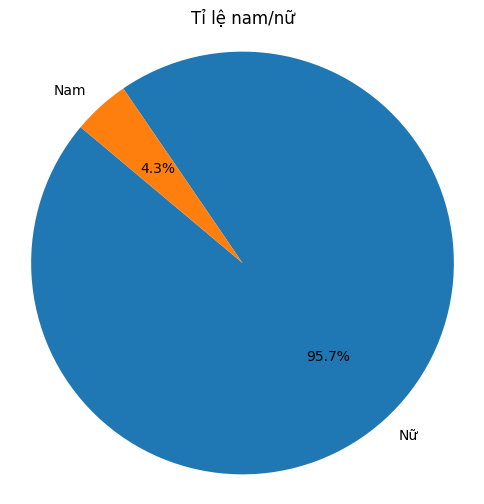

In [136]:
# Tính tỉ lệ nam/nữ
gender_counts = updated_user_profiles['Thông tin cơ bản'].str.contains('Nam|Nữ', case=False).value_counts(normalize=True) * 100

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Nữ', 'Nam'], autopct='%1.1f%%', startangle=140)
plt.title('Tỉ lệ nam/nữ')
plt.axis('equal')
plt.show()

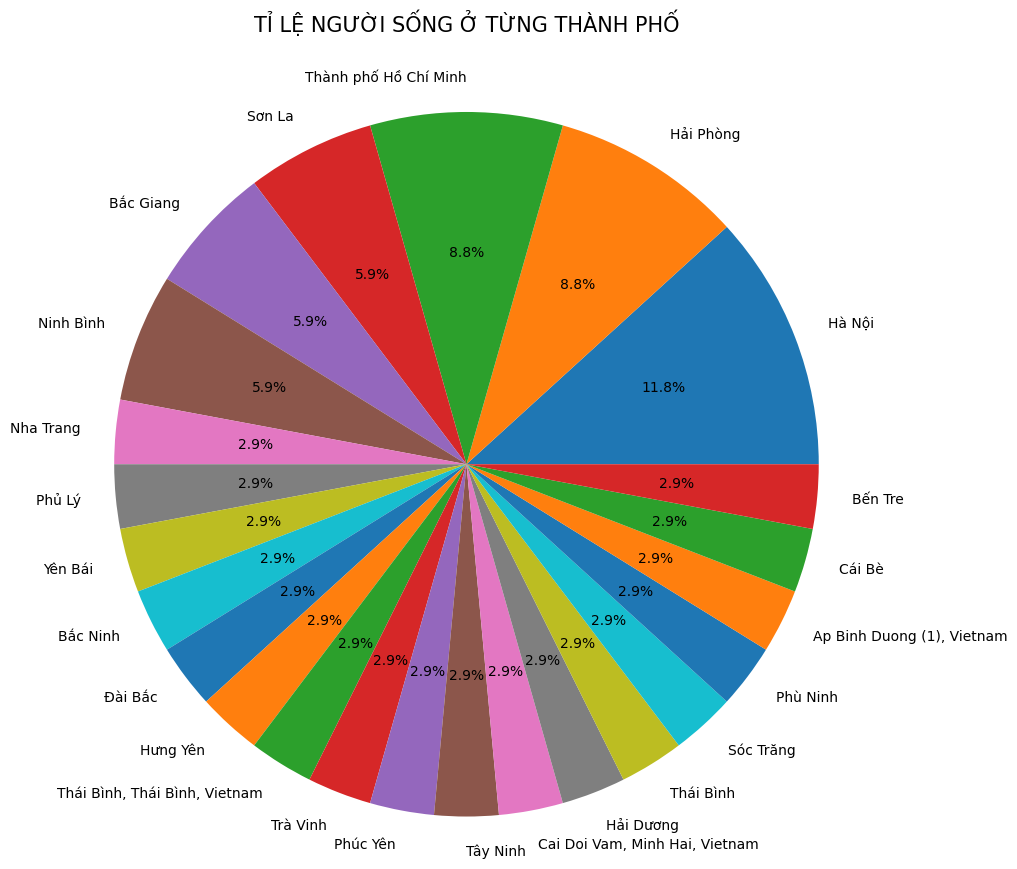

In [135]:
# Thay thế giá trị NaN bằng chuỗi rỗng
updated_user_profiles['Nơi từng sống'] = updated_user_profiles['Nơi từng sống'].fillna('')

# Xử lý dữ liệu
locations = updated_user_profiles['Nơi từng sống'].str.split('\n')
city_data = []

for loc in locations:
    if 'Tỉnh/Thành phố hiện tại' in loc:
        city_index = loc.index('Tỉnh/Thành phố hiện tại') + 1
        if city_index < len(loc):  # Kiểm tra xem có phần tử tiếp theo hay không
            city = loc[city_index]
            city_data.append(city)
    elif 'Quê quán' in loc:
        city_index = loc.index('Quê quán') + 1
        if city_index < len(loc):
            city = loc[city_index]
            city_data.append(city)

city_df = pd.DataFrame(city_data, columns=['City'])
city_counts = city_df['City'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')
plt.title('TỈ LỆ NGƯỜI SỐNG Ở TỪNG THÀNH PHỐ', fontsize=15, y=1.05)
plt.axis('equal')
plt.show()